<h1>Importação dados b3</h1>

In [13]:
import pandas as pd

dados_b3 = pd.DataFrame()

# dados_b3_04_10_2024 = pd.read_csv("D:\\CEDERJ\\2024.2\\tcc\\IVOptionPredictor\\projeto\\data\\b3data_2024.10.04.csv", sep=";")
dados_b3_11_10_2024 = pd.read_csv("D:\\CEDERJ\\2024.2\\tcc\\IVOptionPredictor\\projeto\\data\\b3data_2024.10.11.csv", sep=";")
# dados_b3_18_10_2024 = pd.read_csv("D:\\CEDERJ\\2024.2\\tcc\\IVOptionPredictor\\projeto\\data\\b3data_2024.10.18.csv", sep=";")

# dados_b3_04_10_2024['dtPregao'] = '2024.10.04'
dados_b3_11_10_2024['dtPregao'] = '2024.10.11'
# dados_b3_18_10_2024['dtPregao'] = '2024.10.18'



# dados_b3 = pd.concat([dados_b3, dados_b3_04_10_2024], axis = 0)
dados_b3 = pd.concat([dados_b3, dados_b3_11_10_2024], axis = 0)
# dados_b3 = pd.concat([dados_b3, dados_b3_18_10_2024], axis = 0)

In [31]:
dados_b3_filtrado = dados_b3[dados_b3['dtPregao'] == '2024.10.11']

dados_b3_filtrado['datven'].unique()




NameError: name 'dados_b3' is not defined

<h1>Analisando importação</h1>

In [4]:
dados_b3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 37176 entries, 0 to 15754
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   cod_bdi        37172 non-null  float64
 1   cod_neg        37172 non-null  object 
 2   codigo_origem  2 non-null      object 
 3   codisi         37172 non-null  object 
 4   data_geracao   2 non-null      float64
 5   data_pregao    37172 non-null  float64
 6   datven         37172 non-null  float64
 7   desmes         37172 non-null  float64
 8   espec          37172 non-null  object 
 9   fatcot         37172 non-null  float64
 10  indopc         37172 non-null  float64
 11  modref         37172 non-null  object 
 12  nom_res        37172 non-null  object 
 13  nome_arquivo   2 non-null      object 
 14  prazot         32163 non-null  float64
 15  preabe         37172 non-null  object 
 16  preexe         37172 non-null  object 
 17  premax         37172 non-null  object 
 18  premed     

<h1>Tratamento dos dados</h1>

In [18]:
dados_b3_filtrado = dados_b3[(dados_b3['tp_merc'] == 70) | (dados_b3['tp_merc'] == 80)]

dados_b3_abev_test = dados_b3_filtrado[dados_b3_filtrado['nom_res'].str.startswith('ABEV')]

dados_b3_abev_test_20241220 = dados_b3_abev_test[(dados_b3_abev_test['datven'] == 20241220)]

dados_b3_abev_test_20241220[['cod_neg','preofv','preult','proexe','premed','premin','preofv']]

,cod_neg,preofv,preult,proexe,premed,premin,preofv
1688,ABEVL112,"0,97","0,91",0.0,"0,99","0,91","0,97"
1689,ABEVL122,"0,07","0,14",0.0,"0,14","0,14","0,07"
1690,ABEVL132,"0,74","0,51",0.0,"0,49","0,48","0,74"
1694,ABEVL135,"0,34","0,33",0.0,"0,35","0,33","0,34"
1695,ABEVL120,"0,54","0,40",0.0,"0,39","0,30","0,54"
1696,ABEVL125,"0,00","0,95",0.0,"0,95","0,95","0,00"
1715,ABEVX112,"0,07","0,06",0.0,"0,06","0,06","0,07"
1719,ABEVX135,"0,20","0,59",0.0,"0,59","0,59","0,20"
1720,ABEVX120,"0,15","0,14",0.0,"0,12","0,11","0,15"
1721,ABEVX125,"0,32","0,27",0.0,"0,24","0,19","0,32"


In [11]:
dados_b3_filtrado = dados_b3[(dados_b3['tp_merc'] == 70) | (dados_b3['tp_merc'] == 80)]

dados_b3_filtrado = dados_b3_filtrado[(dados_b3_filtrado['nom_res'].str.startswith('GGBR')) | (dados_b3_filtrado['nom_res'].str.startswith('ABEV')) | (dados_b3_filtrado['nom_res'].str.startswith('ITSA')) | (dados_b3_filtrado['nom_res'].str.startswith('B3SA')) | (dados_b3_filtrado['nom_res'].str.startswith('BBDC')) | (dados_b3_filtrado['nom_res'].str.startswith('MGLU'))]

dados_b3_filtrado['preofc'] = dados_b3_filtrado['preofc'].str.replace(',', '.', regex=False)
dados_b3_filtrado['preofv'] = dados_b3_filtrado['preofv'].str.replace(',', '.', regex=False)
dados_b3_filtrado['preult'] = dados_b3_filtrado['preult'].str.replace(',', '.', regex=False)
dados_b3_filtrado['premed'] = dados_b3_filtrado['premed'].str.replace(',', '.', regex=False)
dados_b3_filtrado['preult'] = pd.to_numeric(dados_b3_filtrado['preult'])
dados_b3_filtrado['preofv'] = pd.to_numeric(dados_b3_filtrado['preofv'])
dados_b3_filtrado['preofc'] = pd.to_numeric(dados_b3_filtrado['preofc'])
dados_b3_filtrado['premed'] = pd.to_numeric(dados_b3_filtrado['premed'])
# dados_b3_filtrado = dados_b3_filtrado[(dados_b3_filtrado['preult'] != 0) | (dados_b3_filtrado['preult'] != 0)]
dados_b3_filtrado = dados_b3_filtrado[(dados_b3_filtrado['preofv'] != 0) | (dados_b3_filtrado['preofv'] != 0)]
dados_b3_filtrado = dados_b3_filtrado[(dados_b3_filtrado['preofc'] != 0) | (dados_b3_filtrado['preofc'] != 0)]
dados_b3_filtrado = dados_b3_filtrado[(dados_b3_filtrado['premed'] != 0) | (dados_b3_filtrado['premed'] != 0)]


dados_b3_filtrado['callPut'] = 0
dados_b3_filtrado.loc[dados_b3_filtrado['tp_merc'] == 70, 'callPut'] = 'call'
dados_b3_filtrado.loc[dados_b3_filtrado['tp_merc'] == 80, 'callPut'] = 'put'

def extrair_decimal(cod_neg):
    sufixo = cod_neg[5:]
    
    try:
        strike = float(sufixo[0:2] + '.' + sufixo[2:])
        if strike > 50:
            strike = strike/10
        return strike
    except:
        return 0
    
# Criar a nova coluna com o valor decimal extraído
dados_b3_filtrado['strike'] = dados_b3_filtrado['cod_neg'].apply(extrair_decimal)
# dados_b3_filtrado['premio'] = (dados_b3_filtrado['preofc'] + dados_b3_filtrado['preult']) /2
dados_b3_filtrado['premio'] = dados_b3_filtrado['premed']
dados_b3_filtrado['taxaDeJuros'] = 0.11
dados_b3_filtrado['dado_original'] = 1

def determinar_vencimento(vencimento):

    diasAteVencDict_04_10_2024 = {20250321: 116,
                        20241114: 30,
                        20241220: 55,
                        20250221: 98,
                        20250117: 73,
                        20241101: 21,
                        20241108: 26}
    diasAteVencDict_18_10_2024 = {20241227: 51,
                    20241129: 31,
                    20241220: 44,
                    20241218: 46}
    diasAteVencDict_11_10_2024 = {20241122: 31,
                    20241213: 46,
                    20241218: 49,
                    20241220: 51,
                    20241227: 56}
    diasAteVencDict = {'2024.10.04': diasAteVencDict_04_10_2024,
              '2024.10.11': diasAteVencDict_11_10_2024,
              '2024.10.18': diasAteVencDict_18_10_2024}
    try:
        dtPregaoDict = diasAteVencDict[vencimento['dtPregao']]
        return dtPregaoDict[vencimento['datven']]
    except:
        return 0

dados_b3_filtrado['diasAteVencimento'] = dados_b3_filtrado.apply(determinar_vencimento, axis=1)
dados_b3_filtrado = dados_b3_filtrado[dados_b3_filtrado['diasAteVencimento'] != 0]

spot_ABEV_04_10_2024 = 13.28
spot_ITSA_04_10_2024 = 10.62
spot_B3SA_04_10_2024 = 10.75
spot_BBDC_04_10_2024 = 15.06
spot_MGLU_04_10_2024 = 9.67
spot_GGBR_04_10_2024 = 19.18

spot_ABEV_11_10_2024 = 12.88
spot_ITSA_11_10_2024 = 10.47
spot_B3SA_11_10_2024 = 10.69
spot_BBDC_11_10_2024 = 14.80
spot_MGLU_11_10_2024 = 9.67
spot_GGBR_11_10_2024 = 18.43

spot_ABEV_18_10_2024 = 12.88
spot_ITSA_18_10_2024 = 10.61
spot_B3SA_18_10_2024 = 10.65
spot_BBDC_18_10_2024 = 15.32
spot_MGLU_18_10_2024 = 9.45
spot_GGBR_18_10_2024 = 18.40
dados_b3_filtrado['spot'] = 0
dados_b3_filtrado.loc[((dados_b3_filtrado['cod_neg'].str.startswith('ABEV')) & (dados_b3_filtrado['dtPregao'] == '2024.10.04')), 'spot'] = spot_ABEV_04_10_2024
dados_b3_filtrado.loc[((dados_b3_filtrado['cod_neg'].str.startswith('ABEV')) & (dados_b3_filtrado['dtPregao'] == '2024.10.11')), 'spot'] = spot_ABEV_11_10_2024
dados_b3_filtrado.loc[((dados_b3_filtrado['cod_neg'].str.startswith('ABEV')) & (dados_b3_filtrado['dtPregao'] == '2024.10.18')), 'spot'] = spot_ABEV_18_10_2024
dados_b3_filtrado.loc[((dados_b3_filtrado['cod_neg'].str.startswith('ITSA')) & (dados_b3_filtrado['dtPregao'] == '2024.10.04')), 'spot'] = spot_ITSA_04_10_2024
dados_b3_filtrado.loc[((dados_b3_filtrado['cod_neg'].str.startswith('ITSA')) & (dados_b3_filtrado['dtPregao'] == '2024.10.11')), 'spot'] = spot_ITSA_11_10_2024
dados_b3_filtrado.loc[((dados_b3_filtrado['cod_neg'].str.startswith('ITSA')) & (dados_b3_filtrado['dtPregao'] == '2024.10.18')), 'spot'] = spot_ITSA_18_10_2024
dados_b3_filtrado.loc[((dados_b3_filtrado['cod_neg'].str.startswith('B3SA')) & (dados_b3_filtrado['dtPregao'] == '2024.10.04')), 'spot'] = spot_B3SA_04_10_2024
dados_b3_filtrado.loc[((dados_b3_filtrado['cod_neg'].str.startswith('B3SA')) & (dados_b3_filtrado['dtPregao'] == '2024.10.11')), 'spot'] = spot_B3SA_11_10_2024
dados_b3_filtrado.loc[((dados_b3_filtrado['cod_neg'].str.startswith('B3SA')) & (dados_b3_filtrado['dtPregao'] == '2024.10.18')), 'spot'] = spot_B3SA_18_10_2024
dados_b3_filtrado.loc[((dados_b3_filtrado['cod_neg'].str.startswith('BBDC')) & (dados_b3_filtrado['dtPregao'] == '2024.10.04')), 'spot'] = spot_BBDC_04_10_2024
dados_b3_filtrado.loc[((dados_b3_filtrado['cod_neg'].str.startswith('BBDC')) & (dados_b3_filtrado['dtPregao'] == '2024.10.11')), 'spot'] = spot_BBDC_11_10_2024
dados_b3_filtrado.loc[((dados_b3_filtrado['cod_neg'].str.startswith('BBDC')) & (dados_b3_filtrado['dtPregao'] == '2024.10.18')), 'spot'] = spot_BBDC_18_10_2024
dados_b3_filtrado.loc[((dados_b3_filtrado['cod_neg'].str.startswith('MGLU')) & (dados_b3_filtrado['dtPregao'] == '2024.10.04')), 'spot'] = spot_MGLU_04_10_2024
dados_b3_filtrado.loc[((dados_b3_filtrado['cod_neg'].str.startswith('MGLU')) & (dados_b3_filtrado['dtPregao'] == '2024.10.11')), 'spot'] = spot_MGLU_11_10_2024
dados_b3_filtrado.loc[((dados_b3_filtrado['cod_neg'].str.startswith('MGLU')) & (dados_b3_filtrado['dtPregao'] == '2024.10.18')), 'spot'] = spot_MGLU_18_10_2024
dados_b3_filtrado.loc[((dados_b3_filtrado['cod_neg'].str.startswith('GGBR')) & (dados_b3_filtrado['dtPregao'] == '2024.10.04')), 'spot'] = spot_GGBR_04_10_2024
dados_b3_filtrado.loc[((dados_b3_filtrado['cod_neg'].str.startswith('GGBR')) & (dados_b3_filtrado['dtPregao'] == '2024.10.11')), 'spot'] = spot_GGBR_11_10_2024
dados_b3_filtrado.loc[((dados_b3_filtrado['cod_neg'].str.startswith('GGBR')) & (dados_b3_filtrado['dtPregao'] == '2024.10.18')), 'spot'] = spot_GGBR_18_10_2024

dados_b3_filtrado = dados_b3_filtrado[['cod_neg','dtPregao','diasAteVencimento','datven','strike','premio','taxaDeJuros','spot','callPut','dado_original']]

dados_b3_filtrado

C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_3216\2805131312.py:20: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'call' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  dados_b3_filtrado.loc[dados_b3_filtrado['tp_merc'] == 70, 'callPut'] = 'call'
C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_3216\2805131312.py:92: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '13.28' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  dados_b3_filtrado.loc[((dados_b3_filtrado['cod_neg'].str.startswith('ABEV')) & (dados_b3_filtrado['dtPregao'] == '2024.10.04')), 'spot'] = spot_ABEV_04_10_2024


,cod_neg,dtPregao,diasAteVencimento,datven,strike,premio,taxaDeJuros,spot,callPut,dado_original
1690,ABEVL132,2024.10.11,51,20241220.0,13.2,0.49,0.11,12.88,call,1
1694,ABEVL135,2024.10.11,51,20241220.0,13.5,0.35,0.11,12.88,call,1
1715,ABEVX112,2024.10.11,51,20241220.0,11.2,0.06,0.11,12.88,put,1
1719,ABEVX135,2024.10.11,51,20241220.0,13.5,0.59,0.11,12.88,put,1
1720,ABEVX120,2024.10.11,51,20241220.0,12.0,0.12,0.11,12.88,put,1
...,...,...,...,...,...,...,...,...,...,...
7454,MGLUX990,2024.10.11,51,20241220.0,9.9,0.27,0.11,9.67,put,1
7457,MGLUX131,2024.10.11,51,20241220.0,13.1,0.01,0.11,9.67,put,1
7458,MGLUX890,2024.10.11,51,20241220.0,8.9,0.73,0.11,9.67,put,1
7503,MGLUX780,2024.10.11,51,20241220.0,7.8,0.40,0.11,9.67,put,1


In [35]:
# Adicione o diretório raiz do projeto ao sys.path
import os
import sys

# Obtém o diretório de trabalho atual
project_root = os.getcwd()

# Se necessário, ajuste o caminho para subir dois diretórios
project_root = os.path.abspath(os.path.join(project_root, '..', '..'))
sys.path.append(project_root)

from src.IVCalculator.IterativeMethods.NewtonRaphson import newton_raphson_for_volatility

def calculate_volatility(row):
    S = row['spot']
    K = row['strike']
    T = row['diasAteVencimento']/ 252
    r = row['taxaDeJuros']
    market_price = row['premio']
    call_or_put = row['callPut']
    
    vol = newton_raphson_for_volatility(S, K, T, r, market_price, call_or_put)
    
    if ( vol != -1 and vol < 100):        
        print(f"############################# {row.name} volatilidade {vol}")

    return vol

dados_b3_filtrado['vol_implicita'] = dados_b3_filtrado.apply(calculate_volatility, axis=1)

volatilidade: 0.24460915988632517
############################# 1680 volatilidade 0.24460915988632517
volatilidade: 0.2406207971059231
############################# 1686 volatilidade 0.2406207971059231
volatilidade: 0.23848694351079044
############################# 1687 volatilidade 0.23848694351079044
volatilidade: 0.2794010651882369
############################# 1688 volatilidade 0.2794010651882369
volatilidade: 0.23690014539276535
############################# 1692 volatilidade 0.23690014539276535
volatilidade: 0.21030123452989524
############################# 1693 volatilidade 0.21030123452989524
volatilidade: 0.22616108632287726
############################# 1709 volatilidade 0.22616108632287726
volatilidade: 0.3076858397224729
############################# 1716 volatilidade 0.3076858397224729
volatilidade: 0.24126175366136915
############################# 1717 volatilidade 0.24126175366136915
volatilidade: 0.22262229369034608
############################# 1726 volatilidade 0.2226

In [36]:
dados_b3_filtrado.to_csv("dados_b3_ingeridos.csv")

In [1]:
import pandas as pd
dados_b3_filtrado = pd.read_csv("dados_b3_ingeridos.csv", sep=",")
dados_b3_filtrado.loc[dados_b3_filtrado['vol_implicita'] == -1, 'vol_implicita'] = 0

spot_ABEV_04_10_2024 = 13.28
spot_ITSA_04_10_2024 = 10.62
spot_B3SA_04_10_2024 = 10.75
spot_BBDC_04_10_2024 = 15.06
spot_MGLU_04_10_2024 = 9.67
spot_GGBR_04_10_2024 = 19.18

spot_ABEV_11_10_2024 = 12.88
spot_ITSA_11_10_2024 = 10.47
spot_B3SA_11_10_2024 = 10.69
spot_BBDC_11_10_2024 = 14.80
spot_MGLU_11_10_2024 = 9.67
spot_GGBR_11_10_2024 = 18.43

spot_ABEV_18_10_2024 = 12.88
spot_ITSA_18_10_2024 = 10.61
spot_B3SA_18_10_2024 = 10.65
spot_BBDC_18_10_2024 = 15.32
spot_MGLU_18_10_2024 = 9.45
spot_GGBR_18_10_2024 = 18.40

dados_b3_filtrado

,Unnamed: 0,cod_neg,dtPregao,diasAteVencimento,datven,strike,premio,taxaDeJuros,spot,callPut,dado_original,vol_implicita
0,1680,ABEVK130,2024.10.04,30,20241114.0,13.0,0.70,0.11,13.28,call,1,0.244609
1,1684,ABEVK115,2024.10.04,30,20241114.0,11.5,0.03,0.11,13.28,call,1,0.000000
2,1686,ABEVK140,2024.10.04,30,20241114.0,14.0,0.23,0.11,13.28,call,1,0.240621
3,1687,ABEVK150,2024.10.04,30,20241114.0,15.0,0.05,0.11,13.28,call,1,0.238487
4,1688,ABEVK160,2024.10.04,30,20241114.0,16.0,0.02,0.11,13.28,call,1,0.279401
...,...,...,...,...,...,...,...,...,...,...,...,...
424,10082,MGLUL119,2024.10.18,44,20241220.0,11.9,0.26,0.11,9.45,call,1,0.000000
425,10084,MGLUL134,2024.10.18,44,20241220.0,13.4,0.13,0.11,9.45,call,1,0.000000
426,10101,MGLUX126,2024.10.18,44,20241220.0,12.6,0.98,0.11,9.45,put,1,0.000000
427,10156,MGLUX900,2024.10.18,44,20241220.0,9.0,0.59,0.11,9.45,put,1,0.569864


In [9]:
dados_b3_filtrado

,Unnamed: 0,cod_neg,data_pregao,diasAteVencimento,datven,strike,premio,taxaDeJuros,spot,callPut,dado_original,vol_implicita
0,1680,ABEVK130,20241004,30,20241114,13.0,0.70,0.11,13.28,call,1,0.244609
1,1684,ABEVK115,20241004,30,20241114,11.5,0.03,0.11,13.28,call,1,-1.000000
2,1686,ABEVK140,20241004,30,20241114,14.0,0.23,0.11,13.28,call,1,0.240621
3,1687,ABEVK150,20241004,30,20241114,15.0,0.05,0.11,13.28,call,1,0.238487
4,1688,ABEVK160,20241004,30,20241114,16.0,0.02,0.11,13.28,call,1,0.279401
...,...,...,...,...,...,...,...,...,...,...,...,...
220,6986,MGLUX780,20241004,55,20241220,7.8,0.35,0.11,9.67,put,1,-1.000000
221,6987,MGLUX820,20241004,55,20241220,8.2,0.45,0.11,9.67,put,1,0.663440
222,6988,MGLUW680,20241004,30,20241114,6.8,0.07,0.11,9.67,put,1,-1.000000
223,6990,MGLUW101,20241004,30,20241114,10.1,0.07,0.11,9.67,put,1,-1.000000


<h1>Analisando Dados</h1>

<h5>Importando modelo</h5>

In [2]:
from joblib import load

# Carregar o modelo salvo
modelo_random_carregado = load('random_forest_treinado.joblib')

modelo_boost_carregado = load('boost_treinado.joblib')

modelo_redeneural_carregado = load('rede_neural.joblib')

<h5>Segregando dados</h5>

In [3]:
dados_b3_abev = dados_b3_filtrado[dados_b3_filtrado['cod_neg'].str.startswith('ABEV')]
dados_b3_itsa = dados_b3_filtrado[dados_b3_filtrado['cod_neg'].str.startswith('ITSA')]
dados_b3_b3sa = dados_b3_filtrado[dados_b3_filtrado['cod_neg'].str.startswith('B3SA')]
dados_b3_bbdc = dados_b3_filtrado[dados_b3_filtrado['cod_neg'].str.startswith('BBDC')]
dados_b3_mglu = dados_b3_filtrado[dados_b3_filtrado['cod_neg'].str.startswith('MGLU')]
dados_b3_ggbr = dados_b3_filtrado[dados_b3_filtrado['cod_neg'].str.startswith('GGBR')]

In [75]:
dados_b3_abev

,cod_neg,dtPregao,diasAteVencimento,datven,strike,premio,taxaDeJuros,spot,callPut,dado_original,vol_implicita
1680,ABEVK130,2024.10.04,30,20241114.0,13.0,0.70,0.11,13.28,call,1,0.244609
1684,ABEVK115,2024.10.04,30,20241114.0,11.5,0.03,0.11,13.28,call,1,0.000000
1686,ABEVK140,2024.10.04,30,20241114.0,14.0,0.23,0.11,13.28,call,1,0.240621
1687,ABEVK150,2024.10.04,30,20241114.0,15.0,0.05,0.11,13.28,call,1,0.238487
1688,ABEVK160,2024.10.04,30,20241114.0,16.0,0.02,0.11,13.28,call,1,0.279401
1692,ABEVK145,2024.10.04,30,20241114.0,14.5,0.11,0.11,13.28,call,1,0.236900
1693,ABEVL135,2024.10.04,55,20241220.0,13.5,0.57,0.11,13.28,call,1,0.210301
1709,ABEVW130,2024.10.04,30,20241114.0,13.0,0.22,0.11,13.28,put,1,0.226161
1716,ABEVW115,2024.10.04,30,20241114.0,11.5,0.04,0.11,13.28,put,1,0.307686
1717,ABEVW125,2024.10.04,30,20241114.0,12.5,0.11,0.11,13.28,put,1,0.241262


<h2>Funções</h2>

In [52]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.stats import pearsonr

# Função quadrática com o ponto de mínimo (x0, y0)
def quadratic_with_minimum(x, a, x0, y0):
    return a * (x - x0)**2 + y0

# Função para ajustar os dados com a restrição de mínimo
def fit_quadratic_with_minimum(x, y, x0, y0):
    # Função auxiliar para ajustar sem passar x0 e y0 diretamente para curve_fit
    def fit_func(x, a):
        return quadratic_with_minimum(x, a, x0, y0)
    
    # Ajustar a função aos dados
    popt, _ = curve_fit(fit_func, x, y)
    
    # Retornar os coeficientes ajustados (a) garantindo que a > 0 (concavidade positiva)
    a = abs(popt[0])  # Garantir que o valor de a seja positivo
    return a, x0, y0

def fitar_superficie(dados: pd.DataFrame, dias_vencimento: int, spot: int, ativo: str, predita : bool = False):
    dados.loc[dados['vol_implicita'] == -1, 'vol_implicita'] = 0
    dados_no_vencimento = dados[dados['diasAteVencimento'] == dias_vencimento]
    dados_no_vencimento = dados[dados['vol_implicita'] > 0]
    x_data = dados_no_vencimento['strike']
    y_data = dados_no_vencimento['vol_implicita']

    # Ponto onde a derivada deve ser zero (por exemplo, x0 = 2)
    x0 = spot

    if not predita:
        dados_originais = dados[(dados['dado_original'] == 1) & (dados['vol_implicita'] > 0)]
        diferencas = (dados_originais['strike'] - x0).abs()
        menor_diferenca = diferencas.min()
        registros_com_menor_diferenca = dados_originais[(diferencas == menor_diferenca)]
        valor_mais_proximo = registros_com_menor_diferenca['vol_implicita'].min()
    else:
        dados_diff = dados[dados['vol_implicita'] > 0]
        diferencas = (dados_diff['strike'] - x0).abs()
        menor_diferenca = diferencas.min()
        registros_com_menor_diferenca = dados_diff[(diferencas == menor_diferenca)]
        valor_mais_proximo = registros_com_menor_diferenca['vol_implicita'].min()
    

    # Obter o valor mais próximo
    # valor_mais_proximo = dados_no_vencimento.loc[indice_mais_proximo, 'vol_implicita']

    y0 = valor_mais_proximo
    x0 = registros_com_menor_diferenca['strike'].min()

    # Ajustar a função quadrática com as restrições
    a, x0, y0 = fit_quadratic_with_minimum(x_data, y_data, x0, y0)

    # Exibir a equação ajustada
    print(f'Equação ajustada: y = {a:.3f}(x - {x0})^2 + {y0}')

    # Calcular os valores previstos pelo modelo ajustado
    y_pred = a * (x_data - x0)**2 + y0

    # Calcular o coeficiente de correlação de Pearson
    corr_coef, _ = pearsonr(y_data, y_pred)
    print(f'Coeficiente de correlação de Pearson: {corr_coef:.4f}')

    # Plotando os dados e a função ajustada
    x_fit = np.linspace(min(x_data), max(x_data), 100)
    y_fit = a * (x_fit - x0)**2 + y0

    plt.scatter(dados['strike'], dados['vol_implicita'], label='Dados')
    plt.plot(x_fit, y_fit, color='red', label='Ajuste Quadrático')
    plt.axvline(x=x0, color='green', linestyle='--', label=f'Derivada zero em x={x0}')
    plt.scatter([x0], [y0], color='blue', label=f'Mínimo em ({x0}, {y0})', zorder=5)
    plt.legend()
    plt.ylim(bottom=0)
    plt.xlabel('Strikes')
    plt.ylabel('Volatilidade')
    plt.title('Smile Volatilidade - ' + ativo[:4] + " - Maturidade: " + str(dias_vencimento) + " dias")
    plt.show()

In [9]:
import math


def fittar_superficie_com_predicoes_para_nao_convergentes(dados: pd.DataFrame, spot: int, vencimento: int, range_spot: int = 1):
    dados_validos = dados[dados['vol_implicita'] != 0]
    dados_validos.loc[:, 'callPut'] = dados_validos['callPut'].replace({'call': 0, 'put': 1})

    dados_faltantes = dados[dados['vol_implicita'] <= 0.01]
    dados_faltantes = dados_faltantes[(dados_faltantes['strike'] <= spot*(1 + range_spot)) & (dados_faltantes['strike'] >= spot*(1 - range_spot))]
    dados_faltantes.loc[:, 'callPut'] = dados_faltantes['callPut'].replace({'call': 0, 'put': 1})

    dados_faltantes.loc[:, 'diasAteVencimento'] = (dados_faltantes['diasAteVencimento'] / 252.0).round(3)

    features_dados_faltantes = dados_faltantes[['strike', 'diasAteVencimento', 'spot', 'taxaDeJuros', 'premio', 'callPut']].values

    vol_implicita_pred = modelo_random_carregado.predict(features_dados_faltantes)

    dados_faltantes['vol_implicita'] = vol_implicita_pred
    
    dados_faltantes['dado_original'] = 0

    dados_completos = pd.concat([dados_validos, dados_faltantes])

    dados_completos[dados_completos['diasAteVencimento'] == vencimento]

    fitar_superficie(dados_completos, vencimento, spot, dados.iloc[0]['cod_neg'])

In [6]:
def fittar_superficie_predita(dados: pd.DataFrame, spot: int, vencimento: int, range_spot: int = 1):
    dados_validos = dados
    dados_validos.loc[:, 'callPut'] = dados_validos['callPut'].replace({'call': 0, 'put': 1})

    # dados_faltantes = dados[dados['vol_implicita'] <= 0.01]
    # dados_faltantes = dados_faltantes[(dados_faltantes['strike'] <= spot*(1 + range_spot)) & (dados_faltantes['strike'] >= spot*(1 - range_spot))]
    # dados_faltantes.loc[:, 'callPut'] = dados_faltantes['callPut'].replace({'call': 0, 'put': 1})

    dados_validos.loc[:, 'diasAteVencimento'] = (dados_validos['diasAteVencimento'] / 252.0).round(3)

    features_dados_validos = dados_validos[['strike', 'diasAteVencimento', 'spot', 'taxaDeJuros', 'premio', 'callPut']].values

    try:
        vol_implicita_pred = modelo_boost_carregado.predict(features_dados_validos)
    except:
        vol_implicita_pred = modelo_boost_carregado.predict(np.asarray(features_dados_validos).astype(np.float32))

    dados_validos['vol_implicita'] = vol_implicita_pred

    dados_completos = dados_validos

    dados_completos[dados_completos['diasAteVencimento'] == vencimento]

    fitar_superficie(dados_completos, vencimento, spot, dados.iloc[0]['cod_neg'], predita=True)

<h3>ABEV3</h3>

In [7]:
dados_b3_abev.loc[dados_b3_abev['vol_implicita'] == -1, 'vol_implicita'] = 0

dados_b3_abev_04_10_2024 = dados_b3_abev[dados_b3_abev['dtPregao'] == '2024.10.04']
dados_b3_abev_11_10_2024 = dados_b3_abev[dados_b3_abev['dtPregao'] == '2024.10.11']
dados_b3_abev_18_10_2024 = dados_b3_abev[dados_b3_abev['dtPregao'] == '2024.10.18']

# dados_b3_abev_04102024_dias_ate_vencimento_30 = dados_b3_abev_04_10_2024[dados_b3_abev_04_10_2024['diasAteVencimento'] == 30]
# dados_b3_abev_04102024_dias_ate_vencimento_55 = dados_b3_abev_04_10_2024[dados_b3_abev_04_10_2024['diasAteVencimento'] == 55]
# dados_b3_abev_11102024_dias_ate_vencimento_51 = dados_b3_abev_11_10_2024[dados_b3_abev_11_10_2024['diasAteVencimento'] == 51]
# dados_b3_abev_18102024_dias_ate_vencimento_44 = dados_b3_abev_18_10_2024[dados_b3_abev_18_10_2024['diasAteVencimento'] == 44]

In [47]:
print(dados_b3_abev_04102024_dias_ate_vencimento_30['diasAteVencimento'].unique())
print("---")
print(dados_b3_abev_11102024_dias_ate_vencimento_51['diasAteVencimento'].unique())
print("---")
print(dados_b3_abev_18102024_dias_ate_vencimento_44['diasAteVencimento'].unique())

[30]
---
[51]
---
[44]


In [32]:
print("30 dias até o vencimento - dia 04 - "  + str((dados_b3_abev_04_10_2024[dados_b3_abev_04_10_2024['diasAteVencimento'] == 30]).shape[0]))
print("55 dias até o vencimento - dia 04 - "  + str((dados_b3_abev_04_10_2024[dados_b3_abev_04_10_2024['diasAteVencimento'] == 55]).shape[0]))
print("51 dias até o vencimento - dia 11 - "  + str((dados_b3_abev_11_10_2024[dados_b3_abev_11_10_2024['diasAteVencimento'] == 51]).shape[0]))
print("44 dias até o vencimento - dia 18 - "  + str((dados_b3_abev_18_10_2024[dados_b3_abev_18_10_2024['diasAteVencimento'] == 44]).shape[0]))
# print("30 dias até o vencimento "  + str((dados_b3_abev[dados_b3_abev['diasAteVencimento'] == 30]).shape[0]))

dados_abev_30dias = dados_b3_abev[dados_b3_abev['diasAteVencimento'] == 30]
dados_abev_30dias.loc[dados_abev_30dias['vol_implicita'] == -1, 'vol_implicita'] = 0
dados_abev_30dias.sort_values(by='strike')

30 dias até o vencimento - dia 04 - 19
55 dias até o vencimento - dia 04 - 5
51 dias até o vencimento - dia 11 - 14
44 dias até o vencimento - dia 18 - 18


,cod_neg,dtPregao,diasAteVencimento,datven,strike,premio,taxaDeJuros,spot,callPut,dado_original,vol_implicita
1684,ABEVK115,2024.10.04,30,20241114.0,11.5,0.03,0.11,13.28,call,1,0.000000
1716,ABEVW115,2024.10.04,30,20241114.0,11.5,0.04,0.11,13.28,put,1,0.307686
1773,ABEVW120,2024.10.04,30,20241114.0,12.0,0.06,0.11,13.28,put,1,0.267829
1717,ABEVW125,2024.10.04,30,20241114.0,12.5,0.11,0.11,13.28,put,1,0.241262
1771,ABEVW127,2024.10.04,30,20241114.0,12.7,0.16,0.11,13.28,put,1,0.244842
1680,ABEVK130,2024.10.04,30,20241114.0,13.0,0.70,0.11,13.28,call,1,0.244609
1709,ABEVW130,2024.10.04,30,20241114.0,13.0,0.22,0.11,13.28,put,1,0.226161
1772,ABEVW132,2024.10.04,30,20241114.0,13.2,0.32,0.11,13.28,put,1,0.240190
1749,ABEVK132,2024.10.04,30,20241114.0,13.2,0.56,0.11,13.28,call,1,0.233453
1774,ABEVW135,2024.10.04,30,20241114.0,13.5,0.43,0.11,13.28,put,1,0.222572


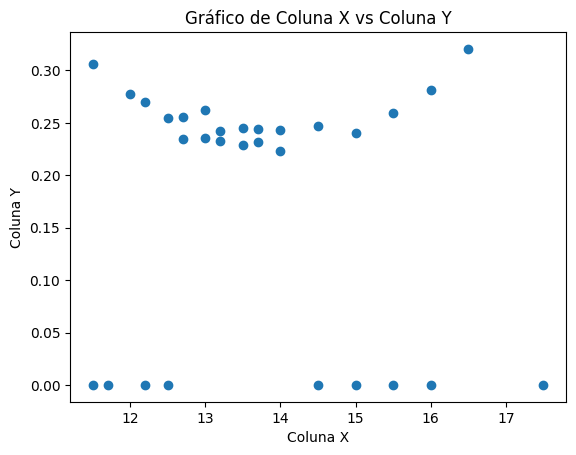

In [135]:
import pandas as pd
import matplotlib.pyplot as plt

# Plotando um gráfico de linha utilizando as colunas 'coluna_x' e 'coluna_y'
plt.scatter(dados_abev_30dias['strike'], dados_abev_30dias['vol_implicita'])

# Adicionando rótulos aos eixos e título
plt.xlabel('Coluna X')
plt.ylabel('Coluna Y')
plt.title('Gráfico de Coluna X vs Coluna Y')

# Exibindo o gráfico
plt.show()

In [26]:
dados_b3_abev_11102024_dias_ate_vencimento_51

,Unnamed: 0,cod_neg,dtPregao,diasAteVencimento,datven,strike,premio,taxaDeJuros,spot,callPut,dado_original,vol_implicita
225,1690,ABEVL132,2024.10.11,0.202,20241220.0,13.2,0.49,0.11,12.88,0,1,0.222331
226,1694,ABEVL135,2024.10.11,0.202,20241220.0,13.5,0.35,0.11,12.88,0,1,0.230368
227,1715,ABEVX112,2024.10.11,0.202,20241220.0,11.2,0.06,0.11,12.88,1,1,0.246703
228,1719,ABEVX135,2024.10.11,0.202,20241220.0,13.5,0.59,0.11,12.88,1,1,0.127653
229,1720,ABEVX120,2024.10.11,0.202,20241220.0,12.0,0.12,0.11,12.88,1,1,0.199169
230,1721,ABEVX125,2024.10.11,0.202,20241220.0,12.5,0.24,0.11,12.88,1,1,0.184970
231,1736,ABEVL130,2024.10.11,0.202,20241220.0,13.0,0.63,0.11,12.88,0,1,0.248428
232,1737,ABEVL147,2024.10.11,0.202,20241220.0,14.7,0.08,0.11,12.88,0,1,0.192108
233,1745,ABEVL137,2024.10.11,0.202,20241220.0,13.7,0.28,0.11,12.88,0,1,0.203190
234,1747,ABEVL145,2024.10.11,0.202,20241220.0,14.5,0.10,0.11,12.88,0,1,0.218471


In [30]:
dados_b3_abev_11102024_dias_ate_vencimento_51.to_csv('teste.csv')

In [29]:
dados_b3_abev_11102024_dias_ate_vencimento_51 = dados_b3_abev_11_10_2024[dados_b3_abev_11_10_2024['diasAteVencimento'] == 51]
dados_b3_abev_11_10_2024

,Unnamed: 0,cod_neg,dtPregao,diasAteVencimento,datven,strike,premio,taxaDeJuros,spot,callPut,dado_original,vol_implicita
225,1690,ABEVL132,2024.10.11,51,20241220.0,13.2,0.49,0.11,12.88,call,1,0.218111
226,1694,ABEVL135,2024.10.11,51,20241220.0,13.5,0.35,0.11,12.88,call,1,0.211485
227,1715,ABEVX112,2024.10.11,51,20241220.0,11.2,0.06,0.11,12.88,put,1,0.268879
228,1719,ABEVX135,2024.10.11,51,20241220.0,13.5,0.59,0.11,12.88,put,1,0.174711
229,1720,ABEVX120,2024.10.11,51,20241220.0,12.0,0.12,0.11,12.88,put,1,0.224607
230,1721,ABEVX125,2024.10.11,51,20241220.0,12.5,0.24,0.11,12.88,put,1,0.222877
231,1736,ABEVL130,2024.10.11,51,20241220.0,13.0,0.63,0.11,12.88,call,1,0.236531
232,1737,ABEVL147,2024.10.11,51,20241220.0,14.7,0.08,0.11,12.88,call,1,0.212397
233,1745,ABEVL137,2024.10.11,51,20241220.0,13.7,0.28,0.11,12.88,call,1,0.210817
234,1747,ABEVL145,2024.10.11,51,20241220.0,14.5,0.10,0.11,12.88,call,1,0.208358


Equação ajustada: y = 0.005(x - 13.0)^2 + 0.2128387614372054
Coeficiente de correlação de Pearson: 0.3453


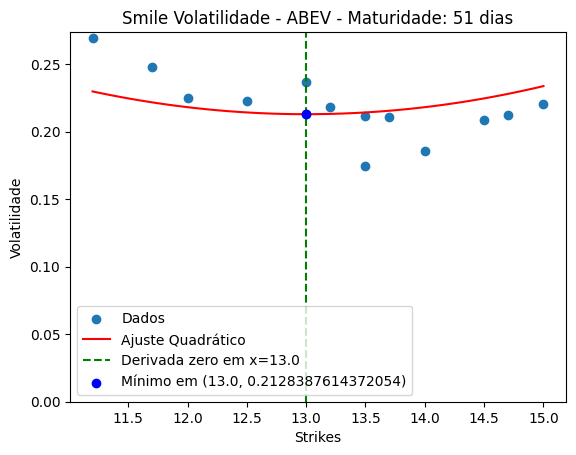

C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_3216\2554654546.py:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dados_validos.loc[:, 'callPut'] = dados_validos['callPut'].replace({'call': 0, 'put': 1})


Equação ajustada: y = 0.005(x - 13.0)^2 + 0.2128387614372054
Coeficiente de correlação de Pearson: 0.3453


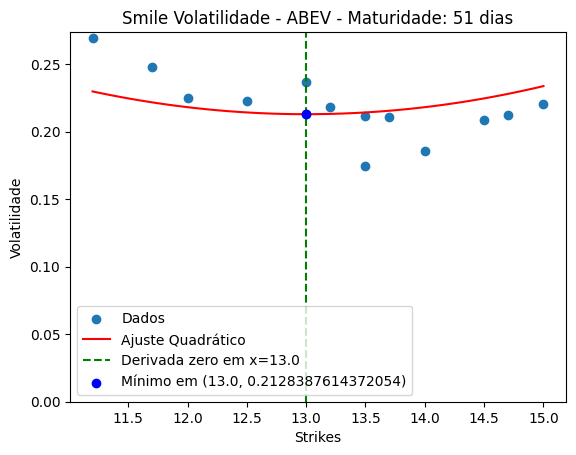

C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_3216\4107859896.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dados_validos.loc[:, 'callPut'] = dados_validos['callPut'].replace({'call': 0, 'put': 1})
C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_3216\4107859896.py:9: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0.202 0.202 0.202 0.202 0.202 0.202 0.202 0.202 0.202 0.202 0.202 0.202
 0.202 0.202]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  dados_validos.loc[:, 'diasAteVencimento'] = (dados_validos['diasAteVencimento'] / 252.0).round(3)


Equação ajustada: y = 0.011(x - 13.0)^2 + 0.18777871131896973
Coeficiente de correlação de Pearson: 0.2761


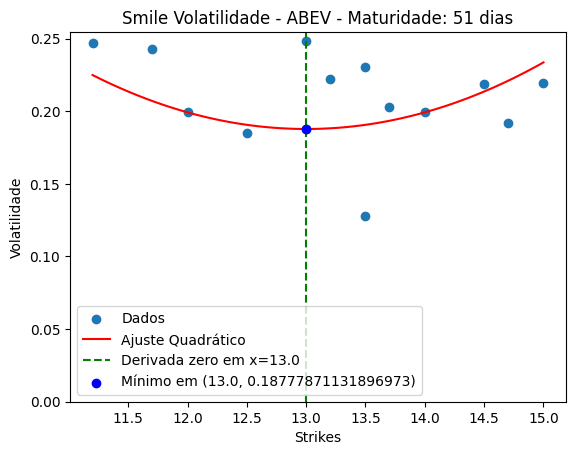

In [38]:
# fitar_superficie(dados_b3_abev_11102024_dias_ate_vencimento_51, 51, spot_ABEV, dados_b3_abev_11102024_dias_ate_vencimento_51.iloc[0]['cod_neg'])

# fitar_superficie(dados_b3_abev_11102024_dias_ate_vencimento_51, 51, spot_ABEV, dados_b3_abev_11102024_dias_ate_vencimento_51.iloc[0]['cod_neg'])
dados_b3_abev_11102024_dias_ate_vencimento_51 = dados_b3_abev_11_10_2024[dados_b3_abev_11_10_2024['diasAteVencimento'] == 51]

fitar_superficie(dados_b3_abev_11102024_dias_ate_vencimento_51, 51, spot_ABEV_11_10_2024, dados_b3_abev_11102024_dias_ate_vencimento_51.iloc[0]['cod_neg'])

dados_b3_abev_11102024_dias_ate_vencimento_51 = dados_b3_abev_11_10_2024[dados_b3_abev_11_10_2024['diasAteVencimento'] == 51]

fittar_superficie_com_predicoes_para_nao_convergentes(dados_b3_abev_11102024_dias_ate_vencimento_51, spot_ABEV_11_10_2024, 51)

dados_b3_abev_11102024_dias_ate_vencimento_51 = dados_b3_abev_11_10_2024[dados_b3_abev_11_10_2024['diasAteVencimento'] == 51]

fittar_superficie_predita(dados_b3_abev_11102024_dias_ate_vencimento_51, spot_ABEV_11_10_2024, 51)

In [12]:
dados_b3_abev_04102024_dias_ate_vencimento_30 = dados_b3_abev_04_10_2024[dados_b3_abev_04_10_2024['diasAteVencimento'] == 30]
dados_b3_abev_04102024_dias_ate_vencimento_30

,Unnamed: 0,cod_neg,dtPregao,diasAteVencimento,datven,strike,premio,taxaDeJuros,spot,callPut,dado_original,vol_implicita
0,1680,ABEVK130,2024.10.04,30,20241114.0,13.0,0.70,0.11,13.28,call,1,0.244609
1,1684,ABEVK115,2024.10.04,30,20241114.0,11.5,0.03,0.11,13.28,call,1,0.000000
2,1686,ABEVK140,2024.10.04,30,20241114.0,14.0,0.23,0.11,13.28,call,1,0.240621
3,1687,ABEVK150,2024.10.04,30,20241114.0,15.0,0.05,0.11,13.28,call,1,0.238487
4,1688,ABEVK160,2024.10.04,30,20241114.0,16.0,0.02,0.11,13.28,call,1,0.279401
5,1692,ABEVK145,2024.10.04,30,20241114.0,14.5,0.11,0.11,13.28,call,1,0.236900
7,1709,ABEVW130,2024.10.04,30,20241114.0,13.0,0.22,0.11,13.28,put,1,0.226161
8,1716,ABEVW115,2024.10.04,30,20241114.0,11.5,0.04,0.11,13.28,put,1,0.307686
9,1717,ABEVW125,2024.10.04,30,20241114.0,12.5,0.11,0.11,13.28,put,1,0.241262
10,1725,ABEVW145,2024.10.04,30,20241114.0,14.5,0.08,0.11,13.28,put,1,0.000000


Equação ajustada: y = 0.007(x - 13.2)^2 + 0.2334533563677195
Coeficiente de correlação de Pearson: 0.6274


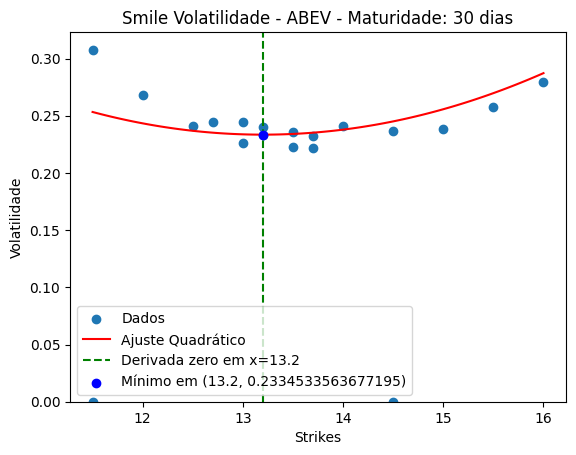

C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_25532\2810010560.py:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dados_validos.loc[:, 'callPut'] = dados_validos['callPut'].replace({'call': 0, 'put': 1})
C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_25532\2810010560.py:10: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dados_faltantes.loc[:, 'callPut'] = dados_faltantes['callPut'].replace({'call': 0, 'put': 1})
C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_25532\2810010560.py:12: FutureWar

Equação ajustada: y = 0.001(x - 13.2)^2 + 0.2334533563677195
Coeficiente de correlação de Pearson: 0.1228


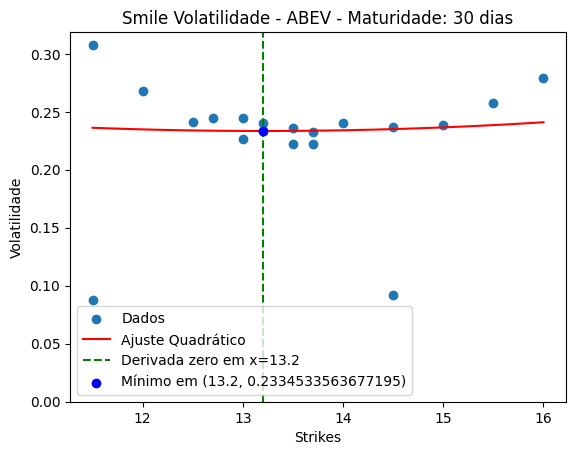

C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_25532\4107859896.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dados_validos.loc[:, 'callPut'] = dados_validos['callPut'].replace({'call': 0, 'put': 1})
C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_25532\4107859896.py:9: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0.119 0.119 0.119 0.119 0.119 0.119 0.119 0.119 0.119 0.119 0.119 0.119
 0.119 0.119 0.119 0.119 0.119 0.119 0.119]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  dados_validos.loc[:, 'diasAteVencimento'] = (dados_validos['diasAteVencimento'] / 252.0).round(3)
C:\Users\Public\Documents\Wondershare\Creat

Equação ajustada: y = 0.014(x - 13.2)^2 + 0.22583548724651337
Coeficiente de correlação de Pearson: 0.3525


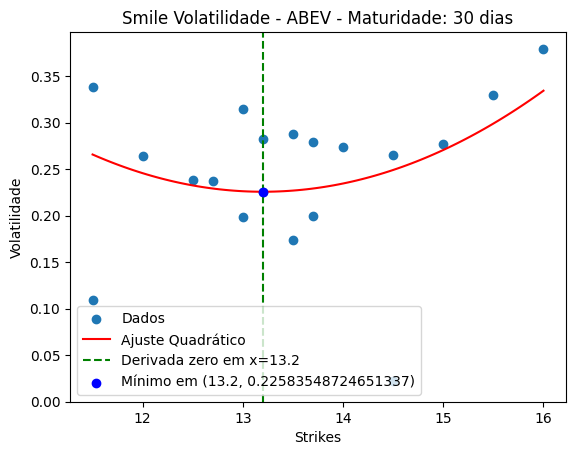

In [10]:
# fitar_superficie(dados_b3_abev_04102024_dias_ate_vencimento_30, 30, spot_ABEV, dados_b3_abev_04102024_dias_ate_vencimento_30.iloc[0]['cod_neg'])

# fitar_superficie(dados_b3_abev_04102024_dias_ate_vencimento_30, 30, spot_ABEV, dados_b3_abev_04102024_dias_ate_vencimento_30.iloc[0]['cod_neg'])
dados_b3_abev_04102024_dias_ate_vencimento_30 = dados_b3_abev_04_10_2024[dados_b3_abev_04_10_2024['diasAteVencimento'] == 30]

fitar_superficie(dados_b3_abev_04102024_dias_ate_vencimento_30, 30, spot_ABEV_04_10_2024, dados_b3_abev_04102024_dias_ate_vencimento_30.iloc[0]['cod_neg'])

dados_b3_abev_04102024_dias_ate_vencimento_30 = dados_b3_abev_04_10_2024[dados_b3_abev_04_10_2024['diasAteVencimento'] == 30]

fittar_superficie_com_predicoes_para_nao_convergentes(dados_b3_abev_04102024_dias_ate_vencimento_30, spot_ABEV_04_10_2024, 30)

dados_b3_abev_04102024_dias_ate_vencimento_30 = dados_b3_abev_04_10_2024[dados_b3_abev_04_10_2024['diasAteVencimento'] == 30]

fittar_superficie_predita(dados_b3_abev_04102024_dias_ate_vencimento_30, spot_ABEV_04_10_2024, 30)

Equação ajustada: y = 0.007(x - 13.2)^2 + 0.2334533563677195
Coeficiente de correlação de Pearson: 0.6274


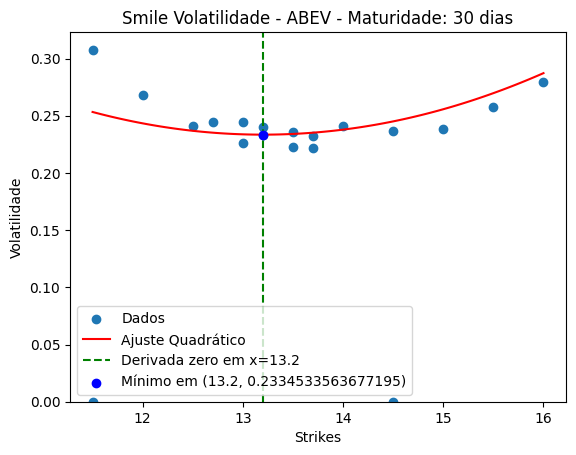

C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_3216\2554654546.py:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dados_validos.loc[:, 'callPut'] = dados_validos['callPut'].replace({'call': 0, 'put': 1})
C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_3216\2554654546.py:10: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dados_faltantes.loc[:, 'callPut'] = dados_faltantes['callPut'].replace({'call': 0, 'put': 1})
C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_3216\2554654546.py:12: FutureWarnin

Equação ajustada: y = 0.001(x - 13.2)^2 + 0.2334533563677195
Coeficiente de correlação de Pearson: 0.1134


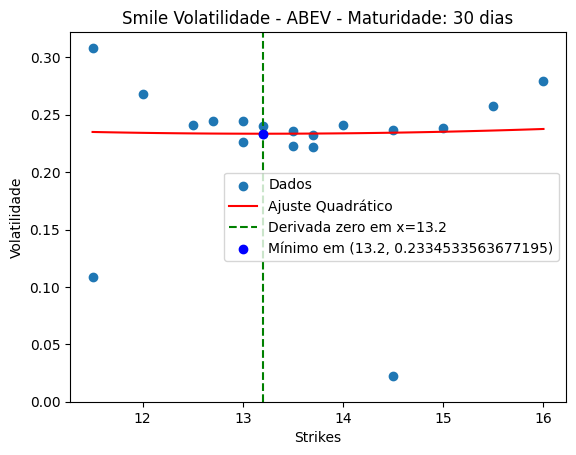

C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_3216\4107859896.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dados_validos.loc[:, 'callPut'] = dados_validos['callPut'].replace({'call': 0, 'put': 1})
C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_3216\4107859896.py:9: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0.119 0.119 0.119 0.119 0.119 0.119 0.119 0.119 0.119 0.119 0.119 0.119
 0.119 0.119 0.119 0.119 0.119 0.119 0.119]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  dados_validos.loc[:, 'diasAteVencimento'] = (dados_validos['diasAteVencimento'] / 252.0).round(3)
C:\Users\Public\Documents\Wondershare\Creator

Equação ajustada: y = 0.014(x - 13.2)^2 + 0.22583548724651337
Coeficiente de correlação de Pearson: 0.3525


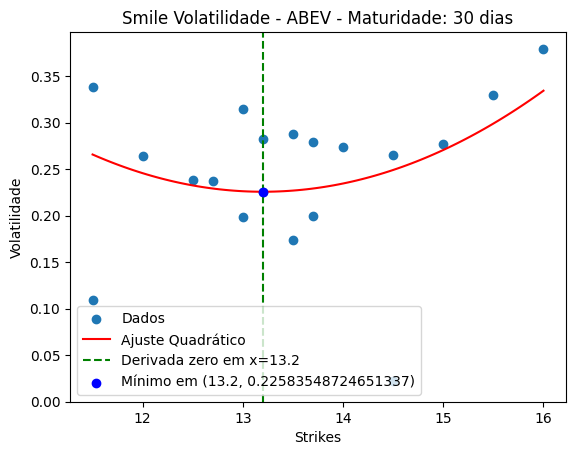

In [37]:
# fitar_superficie(dados_b3_abev_04102024_dias_ate_vencimento_30, 30, spot_ABEV, dados_b3_abev_04102024_dias_ate_vencimento_30.iloc[0]['cod_neg'])
dados_b3_abev_04102024_dias_ate_vencimento_30 = dados_b3_abev_04_10_2024[dados_b3_abev_04_10_2024['diasAteVencimento'] == 30]

fitar_superficie(dados_b3_abev_04102024_dias_ate_vencimento_30, 30, spot_ABEV_04_10_2024, dados_b3_abev_04102024_dias_ate_vencimento_30.iloc[0]['cod_neg'])

dados_b3_abev_04102024_dias_ate_vencimento_30 = dados_b3_abev_04_10_2024[dados_b3_abev_04_10_2024['diasAteVencimento'] == 30]

fittar_superficie_com_predicoes_para_nao_convergentes(dados_b3_abev_04102024_dias_ate_vencimento_30, spot_ABEV_04_10_2024, 30)

dados_b3_abev_04102024_dias_ate_vencimento_30 = dados_b3_abev_04_10_2024[dados_b3_abev_04_10_2024['diasAteVencimento'] == 30]

fittar_superficie_predita(dados_b3_abev_04102024_dias_ate_vencimento_30, spot_ABEV_04_10_2024, 30)

Equação ajustada: y = 0.008(x - 13.0)^2 + 0.1934726592987408
Coeficiente de correlação de Pearson: 0.2233


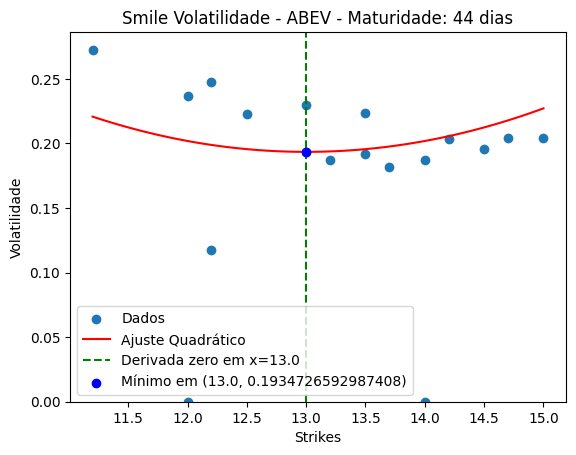

C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_25532\2810010560.py:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dados_validos.loc[:, 'callPut'] = dados_validos['callPut'].replace({'call': 0, 'put': 1})
C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_25532\2810010560.py:10: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dados_faltantes.loc[:, 'callPut'] = dados_faltantes['callPut'].replace({'call': 0, 'put': 1})
C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_25532\2810010560.py:12: FutureWar

Equação ajustada: y = 0.002(x - 13.0)^2 + 0.1934726592987408
Coeficiente de correlação de Pearson: 0.1583


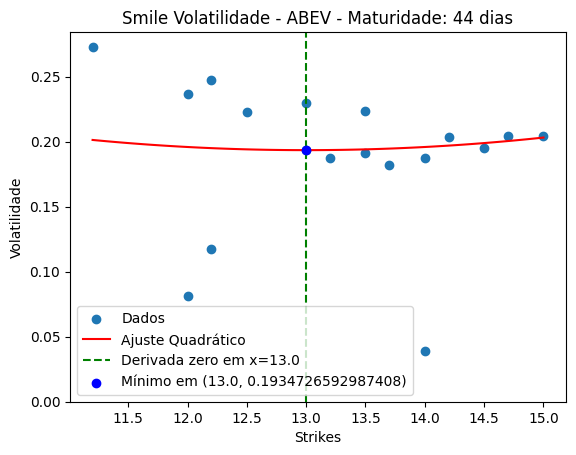

C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_25532\4107859896.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dados_validos.loc[:, 'callPut'] = dados_validos['callPut'].replace({'call': 0, 'put': 1})
C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_25532\4107859896.py:9: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0.175 0.175 0.175 0.175 0.175 0.175 0.175 0.175 0.175 0.175 0.175 0.175
 0.175 0.175 0.175 0.175 0.175 0.175]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  dados_validos.loc[:, 'diasAteVencimento'] = (dados_validos['diasAteVencimento'] / 252.0).round(3)


Equação ajustada: y = 0.023(x - 13.0)^2 + 0.22004938125610352
Coeficiente de correlação de Pearson: 0.3335


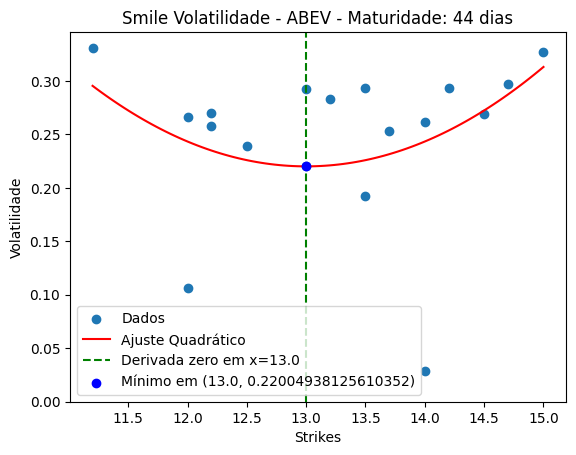

In [13]:
# fitar_superficie(dados_b3_abev_18102024_dias_ate_vencimento_44, 44, spot_ABEV, dados_b3_abev_18102024_dias_ate_vencimento_44.iloc[0]['cod_neg'])
## RESULTADO
dados_b3_abev_18102024_dias_ate_vencimento_44 = dados_b3_abev_18_10_2024[dados_b3_abev_18_10_2024['diasAteVencimento'] == 44]

fitar_superficie(dados_b3_abev_18102024_dias_ate_vencimento_44, 44, spot_ABEV_18_10_2024, dados_b3_abev_18102024_dias_ate_vencimento_44.iloc[0]['cod_neg'])

dados_b3_abev_18102024_dias_ate_vencimento_44 = dados_b3_abev_18_10_2024[dados_b3_abev_18_10_2024['diasAteVencimento'] == 44]

fittar_superficie_com_predicoes_para_nao_convergentes(dados_b3_abev_18102024_dias_ate_vencimento_44, spot_ABEV_18_10_2024, 44)

dados_b3_abev_18102024_dias_ate_vencimento_44 = dados_b3_abev_18_10_2024[dados_b3_abev_18_10_2024['diasAteVencimento'] == 44]

fittar_superficie_predita(dados_b3_abev_18102024_dias_ate_vencimento_44, spot_ABEV_18_10_2024, 44)


Equação ajustada: y = 0.005(x - 13.0)^2 + 0.2128387614372054
Coeficiente de correlação de Pearson: 0.3453


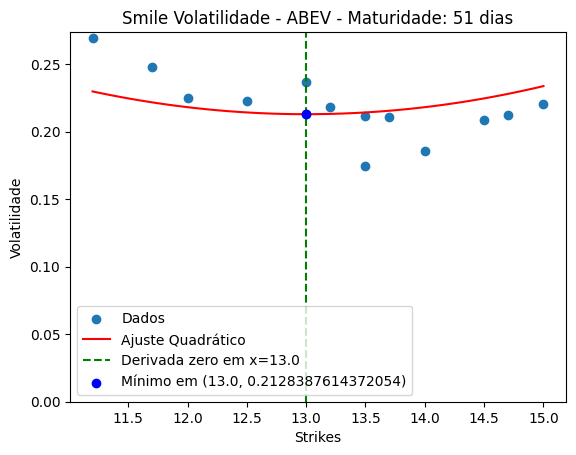

C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_25532\4107859896.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dados_validos.loc[:, 'callPut'] = dados_validos['callPut'].replace({'call': 0, 'put': 1})
C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_25532\4107859896.py:9: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0.202 0.202 0.202 0.202 0.202 0.202 0.202 0.202 0.202 0.202 0.202 0.202
 0.202 0.202]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  dados_validos.loc[:, 'diasAteVencimento'] = (dados_validos['diasAteVencimento'] / 252.0).round(3)


Equação ajustada: y = 0.011(x - 13.0)^2 + 0.18777871131896973
Coeficiente de correlação de Pearson: 0.2761


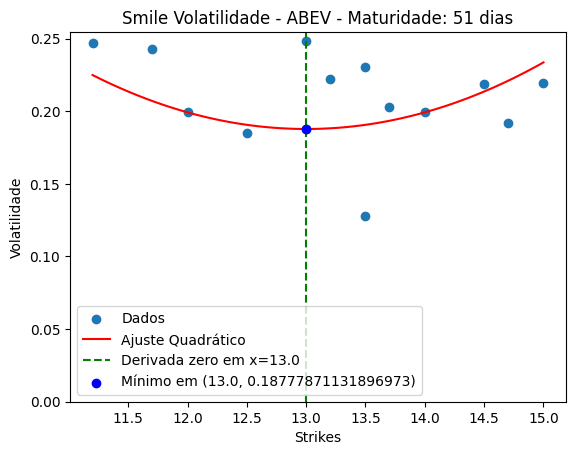

In [14]:
# fitar_superficie(dados_b3_abev_11102024_dias_ate_vencimento_51, 51, spot_ABEV, dados_b3_abev_11102024_dias_ate_vencimento_51.iloc[0]['cod_neg'])
## RESULTADO
dados_b3_abev_11102024_dias_ate_vencimento_51 = dados_b3_abev_11_10_2024[dados_b3_abev_11_10_2024['diasAteVencimento'] == 51]

fitar_superficie(dados_b3_abev_11102024_dias_ate_vencimento_51, 51, spot_ABEV_11_10_2024, dados_b3_abev_11102024_dias_ate_vencimento_51.iloc[0]['cod_neg'])

# dados_b3_abev_11102024_dias_ate_vencimento_51 = dados_b3_abev_11_10_2024[dados_b3_abev_11_10_2024['diasAteVencimento'] == 51]

# fittar_superficie_com_predicoes_para_nao_convergentes(dados_b3_abev_11102024_dias_ate_vencimento_51, spot_ABEV_11_10_2024, 51)

dados_b3_abev_11102024_dias_ate_vencimento_51 = dados_b3_abev_11_10_2024[dados_b3_abev_11_10_2024['diasAteVencimento'] == 51]

fittar_superficie_predita(dados_b3_abev_11102024_dias_ate_vencimento_51, spot_ABEV_11_10_2024, 51)

Equação ajustada: y = 0.008(x - 13.0)^2 + 0.1934726592987408
Coeficiente de correlação de Pearson: 0.2233


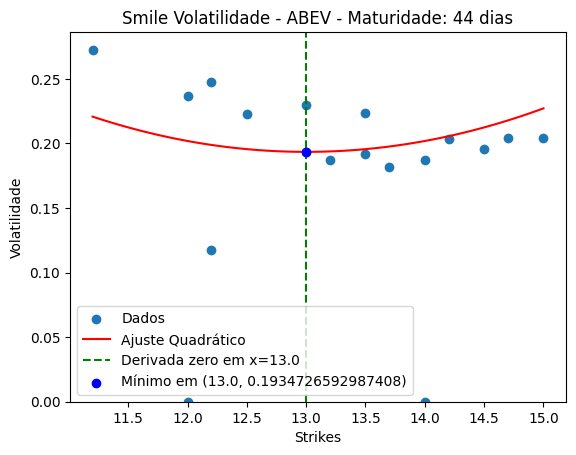

C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_25532\2810010560.py:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dados_validos.loc[:, 'callPut'] = dados_validos['callPut'].replace({'call': 0, 'put': 1})
C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_25532\2810010560.py:10: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dados_faltantes.loc[:, 'callPut'] = dados_faltantes['callPut'].replace({'call': 0, 'put': 1})
C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_25532\2810010560.py:12: FutureWar

Equação ajustada: y = 0.002(x - 13.0)^2 + 0.1934726592987408
Coeficiente de correlação de Pearson: 0.1583


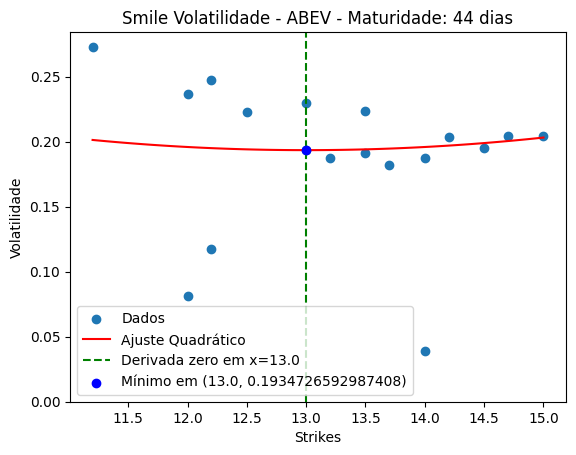

C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_25532\4107859896.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dados_validos.loc[:, 'callPut'] = dados_validos['callPut'].replace({'call': 0, 'put': 1})
C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_25532\4107859896.py:9: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0.175 0.175 0.175 0.175 0.175 0.175 0.175 0.175 0.175 0.175 0.175 0.175
 0.175 0.175 0.175 0.175 0.175 0.175]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  dados_validos.loc[:, 'diasAteVencimento'] = (dados_validos['diasAteVencimento'] / 252.0).round(3)


Equação ajustada: y = 0.023(x - 13.0)^2 + 0.22004938125610352
Coeficiente de correlação de Pearson: 0.3335


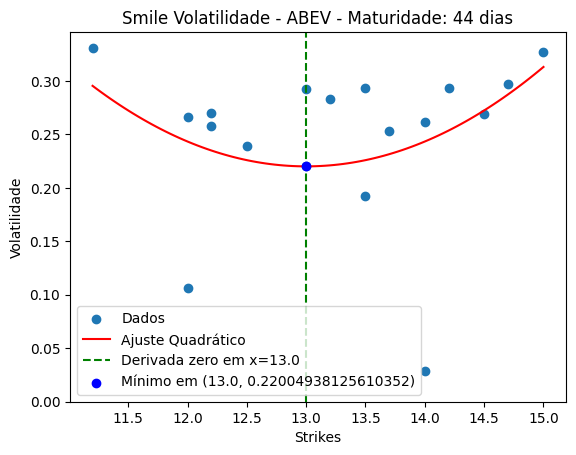

In [20]:
dados_b3_abev_18102024_dias_ate_vencimento_44 = dados_b3_abev_18_10_2024[dados_b3_abev_18_10_2024['diasAteVencimento'] == 44]

fitar_superficie(dados_b3_abev_18102024_dias_ate_vencimento_44, 44, spot_ABEV_18_10_2024, dados_b3_abev_18102024_dias_ate_vencimento_44.iloc[0]['cod_neg'])

dados_b3_abev_18102024_dias_ate_vencimento_44 = dados_b3_abev_18_10_2024[dados_b3_abev_18_10_2024['diasAteVencimento'] == 44]

fittar_superficie_com_predicoes_para_nao_convergentes(dados_b3_abev_18102024_dias_ate_vencimento_44, spot_ABEV_18_10_2024, 44)

dados_b3_abev_18102024_dias_ate_vencimento_44 = dados_b3_abev_18_10_2024[dados_b3_abev_18_10_2024['diasAteVencimento'] == 44]

fittar_superficie_predita(dados_b3_abev_18102024_dias_ate_vencimento_44, spot_ABEV_18_10_2024, 44)

<h3>ITSA</h3>

In [27]:

dados_b3_itsa_11_10_2024 = dados_b3_itsa[dados_b3_itsa['dtPregao'] == '2024.10.11']
dados_b3_itsa_11_10_2024

,Unnamed: 0,cod_neg,dtPregao,diasAteVencimento,datven,strike,premio,taxaDeJuros,spot,callPut,dado_original,vol_implicita
292,6481,ITSAL115,2024.10.11,51,20241220.0,11.50,0.20,0.11,10.47,call,1,0.253917
293,6482,ITSAL125,2024.10.11,51,20241220.0,12.50,0.04,0.11,10.47,call,1,0.238501
294,6483,ITSAX115,2024.10.11,51,20241220.0,11.50,0.51,0.11,10.47,put,1,0.000000
295,6487,ITSAL977,2024.10.11,51,20241220.0,9.77,0.09,0.11,10.47,call,1,0.000000
296,6493,ITSAX103,2024.10.11,51,20241220.0,10.30,0.14,0.11,10.47,put,1,0.161275
297,6494,ITSAX997,2024.10.11,51,20241220.0,9.97,0.07,0.11,10.47,put,1,0.167206
298,6496,ITSAX100,2024.10.11,51,20241220.0,10.00,0.08,0.11,10.47,put,1,0.170918
299,6501,ITSAL108,2024.10.11,51,20241220.0,10.80,0.36,0.11,10.47,call,1,0.214380
300,6505,ITSAX108,2024.10.11,51,20241220.0,10.80,0.33,0.11,10.47,put,1,0.149243
301,6508,ITSAL113,2024.10.11,51,20241220.0,11.30,0.12,0.11,10.47,call,1,0.172510


In [29]:
dados_b3_itsa

dados_b3_itsa.loc[dados_b3_itsa['vol_implicita'] == -1, 'vol_implicita'] = 0

dados_b3_itsa_04_10_2024 = dados_b3_itsa[dados_b3_itsa['dtPregao'] == '2024.10.04']
dados_b3_itsa_11_10_2024 = dados_b3_itsa[dados_b3_itsa['dtPregao'] == '2024.10.11']
dados_b3_itsa_18_10_2024 = dados_b3_itsa[dados_b3_itsa['dtPregao'] == '2024.10.18']

dados_b3_itsa_04102024_dias_ate_vencimento_30 = dados_b3_itsa_04_10_2024[dados_b3_itsa_04_10_2024['diasAteVencimento'] == 30]
dados_b3_itsa_04102024_dias_ate_vencimento_55 = dados_b3_itsa_04_10_2024[dados_b3_itsa_04_10_2024['diasAteVencimento'] == 55]

dados_b3_itsa_11102024_dias_ate_vencimento_51 = dados_b3_itsa_11_10_2024[dados_b3_itsa_11_10_2024['diasAteVencimento'] == 51]

dados_b3_itsa_04102024_dias_ate_vencimento_51 = dados_b3_itsa_11_10_2024[dados_b3_itsa_11_10_2024['diasAteVencimento'] == 51]

dados_b3_itsa_18102024_dias_ate_vencimento_44 = dados_b3_itsa_18_10_2024[dados_b3_itsa_18_10_2024['diasAteVencimento'] == 44]

Equação ajustada: y = 0.017(x - 10.4)^2 + 0.1722076281973312
Coeficiente de correlação de Pearson: 0.5687


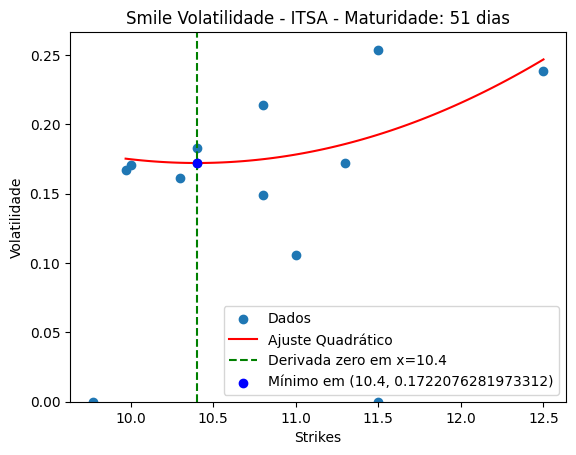

C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_25532\2810010560.py:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dados_validos.loc[:, 'callPut'] = dados_validos['callPut'].replace({'call': 0, 'put': 1})
C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_25532\2810010560.py:10: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dados_faltantes.loc[:, 'callPut'] = dados_faltantes['callPut'].replace({'call': 0, 'put': 1})
C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_25532\2810010560.py:12: FutureWar

Equação ajustada: y = 0.013(x - 10.4)^2 + 0.1722076281973312
Coeficiente de correlação de Pearson: 0.4709


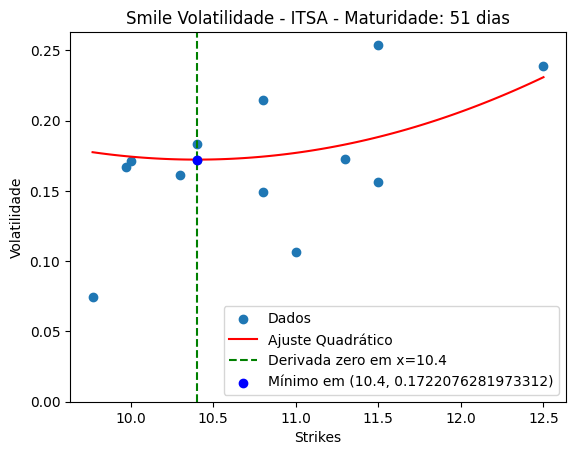

C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_25532\4107859896.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dados_validos.loc[:, 'callPut'] = dados_validos['callPut'].replace({'call': 0, 'put': 1})
C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_25532\4107859896.py:9: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0.202 0.202 0.202 0.202 0.202 0.202 0.202 0.202 0.202 0.202 0.202 0.202
 0.202]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  dados_validos.loc[:, 'diasAteVencimento'] = (dados_validos['diasAteVencimento'] / 252.0).round(3)


Equação ajustada: y = 0.045(x - 10.4)^2 + 0.11817781627178192
Coeficiente de correlação de Pearson: 0.5055


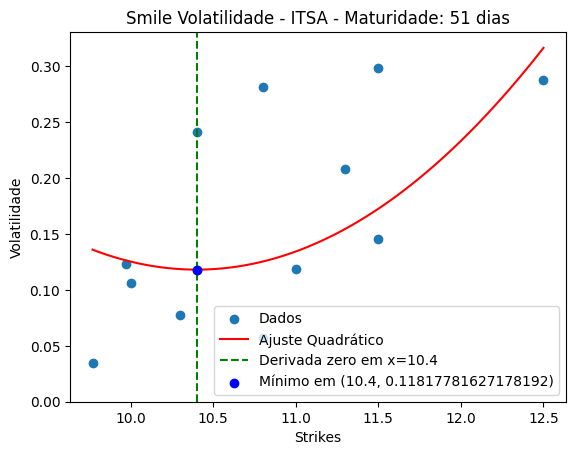

In [30]:
dados_b3_itsa_11102024_dias_ate_vencimento_51 = dados_b3_itsa_11_10_2024[dados_b3_itsa_11_10_2024['diasAteVencimento'] == 51]

fitar_superficie(dados_b3_itsa_11102024_dias_ate_vencimento_51, 51, spot_ITSA_11_10_2024, dados_b3_itsa_11102024_dias_ate_vencimento_51.iloc[0]['cod_neg'])

dados_b3_itsa_11102024_dias_ate_vencimento_51 = dados_b3_itsa_11_10_2024[dados_b3_itsa_11_10_2024['diasAteVencimento'] == 51]

fittar_superficie_com_predicoes_para_nao_convergentes(dados_b3_itsa_11102024_dias_ate_vencimento_51, spot_ITSA_11_10_2024, 51)

dados_b3_itsa_11102024_dias_ate_vencimento_51 = dados_b3_itsa_11_10_2024[dados_b3_itsa_11_10_2024['diasAteVencimento'] == 51]

fittar_superficie_predita(dados_b3_itsa_11102024_dias_ate_vencimento_51, spot_ITSA_11_10_2024, 51)

Equação ajustada: y = 0.032(x - 10.8)^2 + 0.1401296570037567
Coeficiente de correlação de Pearson: 0.3974


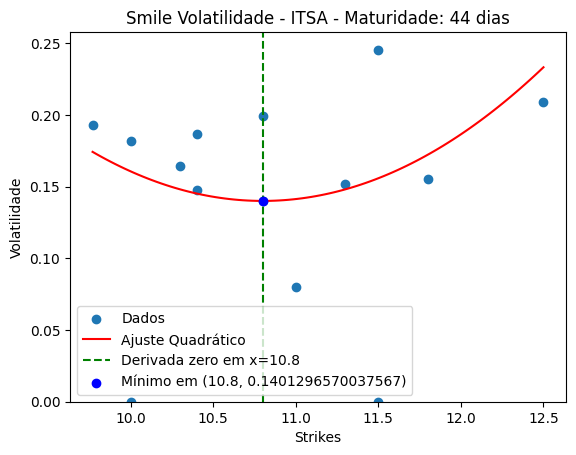

C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_25532\2810010560.py:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dados_validos.loc[:, 'callPut'] = dados_validos['callPut'].replace({'call': 0, 'put': 1})
C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_25532\2810010560.py:10: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dados_faltantes.loc[:, 'callPut'] = dados_faltantes['callPut'].replace({'call': 0, 'put': 1})
C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_25532\2810010560.py:12: FutureWar

Equação ajustada: y = 0.031(x - 10.8)^2 + 0.1401296570037567
Coeficiente de correlação de Pearson: 0.3724


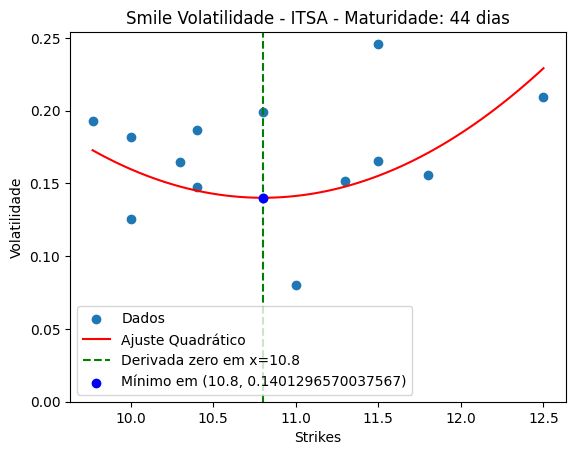

C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_25532\4107859896.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dados_validos.loc[:, 'callPut'] = dados_validos['callPut'].replace({'call': 0, 'put': 1})
C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_25532\4107859896.py:9: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0.175 0.175 0.175 0.175 0.175 0.175 0.175 0.175 0.175 0.175 0.175 0.175
 0.175 0.175]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  dados_validos.loc[:, 'diasAteVencimento'] = (dados_validos['diasAteVencimento'] / 252.0).round(3)


Equação ajustada: y = 0.138(x - 10.8)^2 + 0.06363371759653091
Coeficiente de correlação de Pearson: 0.4516


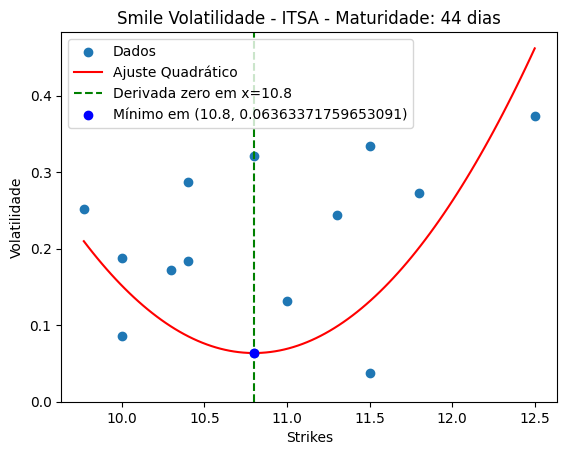

In [23]:
dados_b3_itsa_18102024_dias_ate_vencimento_44 = dados_b3_itsa_18_10_2024[dados_b3_itsa_18_10_2024['diasAteVencimento'] == 44]

fitar_superficie(dados_b3_itsa_18102024_dias_ate_vencimento_44, 44, spot_ITSA_18_10_2024, dados_b3_itsa_18102024_dias_ate_vencimento_44.iloc[0]['cod_neg'])

dados_b3_itsa_18102024_dias_ate_vencimento_44 = dados_b3_itsa_18_10_2024[dados_b3_itsa_18_10_2024['diasAteVencimento'] == 44]

fittar_superficie_com_predicoes_para_nao_convergentes(dados_b3_itsa_18102024_dias_ate_vencimento_44, spot_ITSA_18_10_2024, 44)

dados_b3_itsa_18102024_dias_ate_vencimento_44 = dados_b3_itsa_18_10_2024[dados_b3_itsa_18_10_2024['diasAteVencimento'] == 44]

fittar_superficie_predita(dados_b3_itsa_18102024_dias_ate_vencimento_44, spot_ITSA_18_10_2024, 44)

Equação ajustada: y = 0.021(x - 10.5)^2 + 0.1716546680200714
Coeficiente de correlação de Pearson: 0.1617


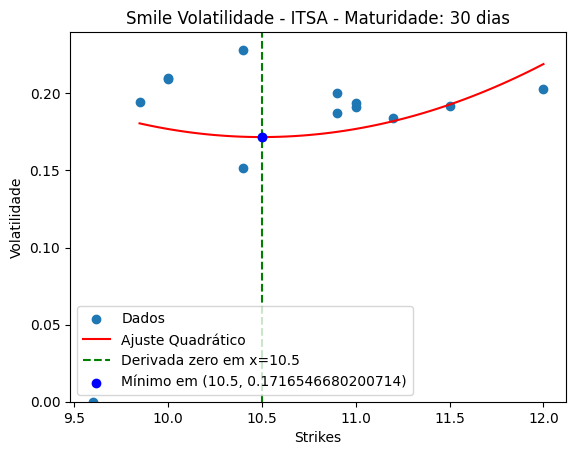

C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_25532\2810010560.py:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dados_validos.loc[:, 'callPut'] = dados_validos['callPut'].replace({'call': 0, 'put': 1})
C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_25532\2810010560.py:10: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dados_faltantes.loc[:, 'callPut'] = dados_faltantes['callPut'].replace({'call': 0, 'put': 1})
C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_25532\2810010560.py:12: FutureWar

Equação ajustada: y = 0.016(x - 10.5)^2 + 0.1716546680200714
Coeficiente de correlação de Pearson: 0.0122


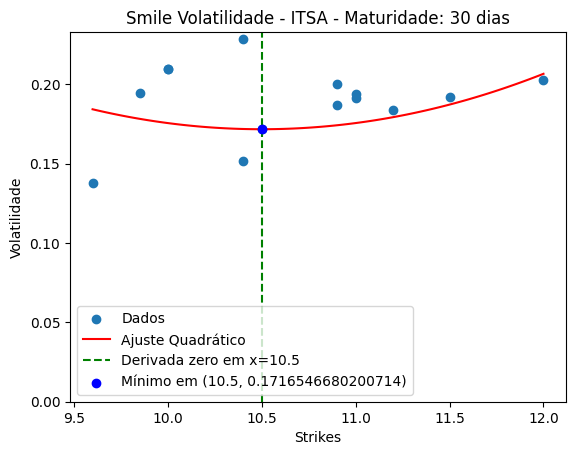

C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_25532\4107859896.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dados_validos.loc[:, 'callPut'] = dados_validos['callPut'].replace({'call': 0, 'put': 1})
C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_25532\4107859896.py:9: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0.119 0.119 0.119 0.119 0.119 0.119 0.119 0.119 0.119 0.119 0.119 0.119
 0.119 0.119]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  dados_validos.loc[:, 'diasAteVencimento'] = (dados_validos['diasAteVencimento'] / 252.0).round(3)
C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_25532\4107859

Equação ajustada: y = 0.104(x - 10.5)^2 + 0.11376044899225235
Coeficiente de correlação de Pearson: 0.4391


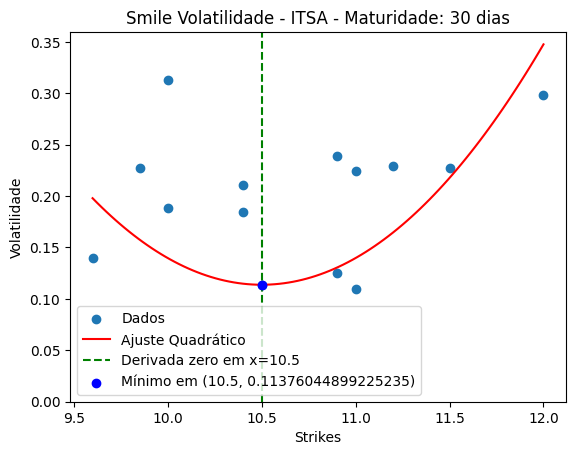

In [24]:
# fitar_superficie(dados_b3_itsa_04102024_dias_ate_vencimento_30, 30, spot_ABEV, dados_b3_itsa_04102024_dias_ate_vencimento_30.iloc[0]['cod_neg'])
## RESULTADO
dados_b3_itsa_04102024_dias_ate_vencimento_30 = dados_b3_itsa_04_10_2024[dados_b3_itsa_04_10_2024['diasAteVencimento'] == 30]

fitar_superficie(dados_b3_itsa_04102024_dias_ate_vencimento_30, 30, spot_ITSA_04_10_2024, dados_b3_itsa_04102024_dias_ate_vencimento_30.iloc[0]['cod_neg'])

dados_b3_itsa_04102024_dias_ate_vencimento_30 = dados_b3_itsa_04_10_2024[dados_b3_itsa_04_10_2024['diasAteVencimento'] == 30]

fittar_superficie_com_predicoes_para_nao_convergentes(dados_b3_itsa_04102024_dias_ate_vencimento_30, spot_ITSA_04_10_2024, 30)

dados_b3_itsa_04102024_dias_ate_vencimento_30 = dados_b3_itsa_04_10_2024[dados_b3_itsa_04_10_2024['diasAteVencimento'] == 30]

fittar_superficie_predita(dados_b3_itsa_04102024_dias_ate_vencimento_30, spot_ITSA_04_10_2024, 30)


Equação ajustada: y = 0.017(x - 10.4)^2 + 0.1722076281973312
Coeficiente de correlação de Pearson: 0.5687


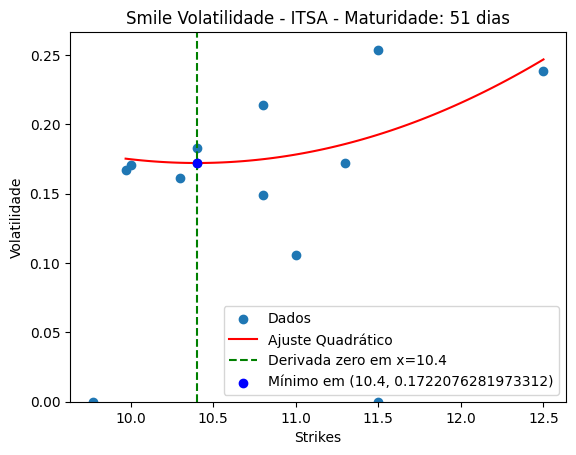

C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_25532\2810010560.py:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dados_validos.loc[:, 'callPut'] = dados_validos['callPut'].replace({'call': 0, 'put': 1})
C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_25532\2810010560.py:10: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dados_faltantes.loc[:, 'callPut'] = dados_faltantes['callPut'].replace({'call': 0, 'put': 1})
C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_25532\2810010560.py:12: FutureWar

Equação ajustada: y = 0.013(x - 10.4)^2 + 0.1722076281973312
Coeficiente de correlação de Pearson: 0.4709


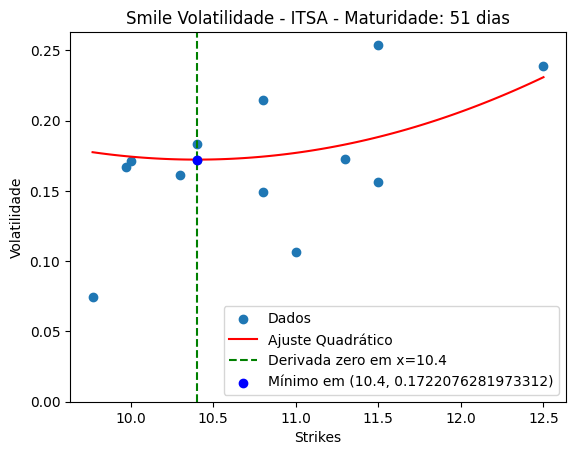

C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_25532\4107859896.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dados_validos.loc[:, 'callPut'] = dados_validos['callPut'].replace({'call': 0, 'put': 1})
C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_25532\4107859896.py:9: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0.202 0.202 0.202 0.202 0.202 0.202 0.202 0.202 0.202 0.202 0.202 0.202
 0.202]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  dados_validos.loc[:, 'diasAteVencimento'] = (dados_validos['diasAteVencimento'] / 252.0).round(3)


Equação ajustada: y = 0.045(x - 10.4)^2 + 0.11817781627178192
Coeficiente de correlação de Pearson: 0.5055


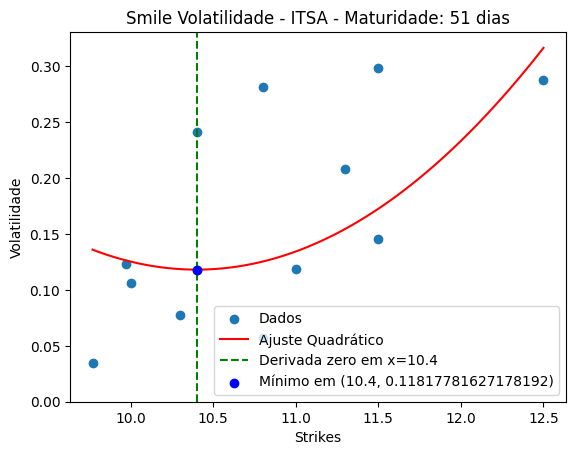

In [25]:
# fitar_superficie(dados_b3_itsa_11102024_dias_ate_vencimento_51, 51, spot_ABEV, dados_b3_itsa_11102024_dias_ate_vencimento_51.iloc[0]['cod_neg'])
## RESULTADO
dados_b3_itsa_11102024_dias_ate_vencimento_51 = dados_b3_itsa_11_10_2024[dados_b3_itsa_11_10_2024['diasAteVencimento'] == 51]

fitar_superficie(dados_b3_itsa_11102024_dias_ate_vencimento_51, 51, spot_ITSA_11_10_2024, dados_b3_itsa_11102024_dias_ate_vencimento_51.iloc[0]['cod_neg'])

dados_b3_itsa_11102024_dias_ate_vencimento_51 = dados_b3_itsa_11_10_2024[dados_b3_itsa_11_10_2024['diasAteVencimento'] == 51]

fittar_superficie_com_predicoes_para_nao_convergentes(dados_b3_itsa_11102024_dias_ate_vencimento_51, spot_ITSA_11_10_2024, 51)

dados_b3_itsa_11102024_dias_ate_vencimento_51 = dados_b3_itsa_11_10_2024[dados_b3_itsa_11_10_2024['diasAteVencimento'] == 51]

fittar_superficie_predita(dados_b3_itsa_11102024_dias_ate_vencimento_51, spot_ITSA_11_10_2024, 51)

Equação ajustada: y = 0.032(x - 10.8)^2 + 0.1401296570037567
Coeficiente de correlação de Pearson: 0.3974


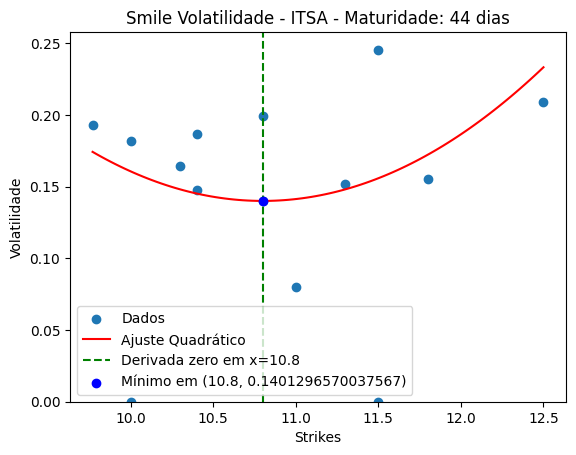

C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_25532\4107859896.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dados_validos.loc[:, 'callPut'] = dados_validos['callPut'].replace({'call': 0, 'put': 1})
C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_25532\4107859896.py:9: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0.175 0.175 0.175 0.175 0.175 0.175 0.175 0.175 0.175 0.175 0.175 0.175
 0.175 0.175]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  dados_validos.loc[:, 'diasAteVencimento'] = (dados_validos['diasAteVencimento'] / 252.0).round(3)


Equação ajustada: y = 0.138(x - 10.8)^2 + 0.06363371759653091
Coeficiente de correlação de Pearson: 0.4516


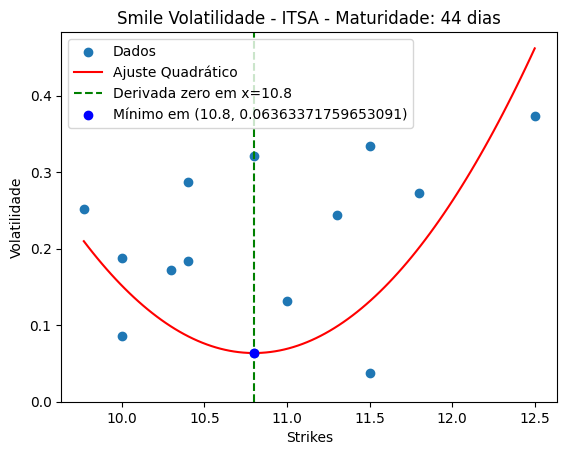

C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_25532\2810010560.py:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dados_validos.loc[:, 'callPut'] = dados_validos['callPut'].replace({'call': 0, 'put': 1})
C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_25532\2810010560.py:10: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dados_faltantes.loc[:, 'callPut'] = dados_faltantes['callPut'].replace({'call': 0, 'put': 1})
C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_25532\2810010560.py:12: FutureWar

Equação ajustada: y = 0.031(x - 10.8)^2 + 0.1401296570037567
Coeficiente de correlação de Pearson: 0.3724


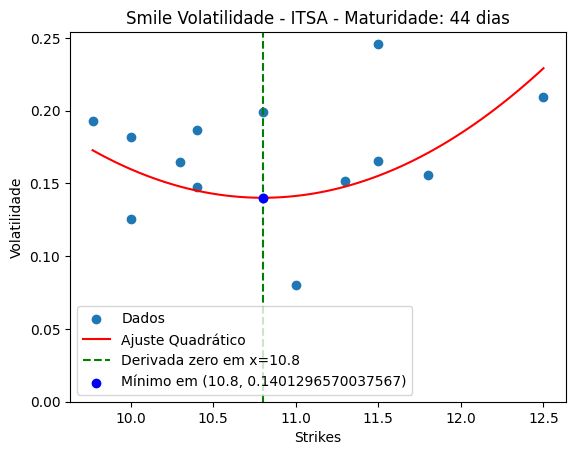

In [ ]:
# resultado
dados_b3_itsa_18102024_dias_ate_vencimento_44 = dados_b3_itsa_18_10_2024[dados_b3_itsa_18_10_2024['diasAteVencimento'] == 44]
fitar_superficie(dados_b3_itsa_18102024_dias_ate_vencimento_44, 44, spot_ITSA_18_10_2024, dados_b3_itsa_18102024_dias_ate_vencimento_44.iloc[0]['cod_neg'])

dados_b3_itsa_18102024_dias_ate_vencimento_44 = dados_b3_itsa_18_10_2024[dados_b3_itsa_18_10_2024['diasAteVencimento'] == 44]
fittar_superficie_predita(dados_b3_itsa_18102024_dias_ate_vencimento_44, spot_ITSA_18_10_2024, 44)

dados_b3_itsa_18102024_dias_ate_vencimento_44 = dados_b3_itsa_18_10_2024[dados_b3_itsa_18_10_2024['diasAteVencimento'] == 44]
fittar_superficie_com_predicoes_para_nao_convergentes(dados_b3_itsa_18102024_dias_ate_vencimento_44, spot_ITSA_18_10_2024, 44)

<h3>B3SA</h3>

In [31]:
dados_b3_b3sa.sort_values(by='strike')

dados_b3_b3sa_04_10_2024 = dados_b3_b3sa[dados_b3_b3sa['dtPregao'] == '2024.10.04']
dados_b3_b3sa_11_10_2024 = dados_b3_b3sa[dados_b3_b3sa['dtPregao'] == '2024.10.11']
dados_b3_b3sa_18_10_2024 = dados_b3_b3sa[dados_b3_b3sa['dtPregao'] == '2024.10.18']

In [ ]:
print(dados_b3_abev_04_10_2024['diasAteVencimento'].unique())
print(dados_b3_abev_11_10_2024['diasAteVencimento'].unique())
print(dados_b3_abev_18_10_2024['diasAteVencimento'].unique())

[30 55]
[51]
[44]


Equação ajustada: y = 0.015(x - 10.7)^2 + 0.284982169898693
Coeficiente de correlação de Pearson: 0.5844


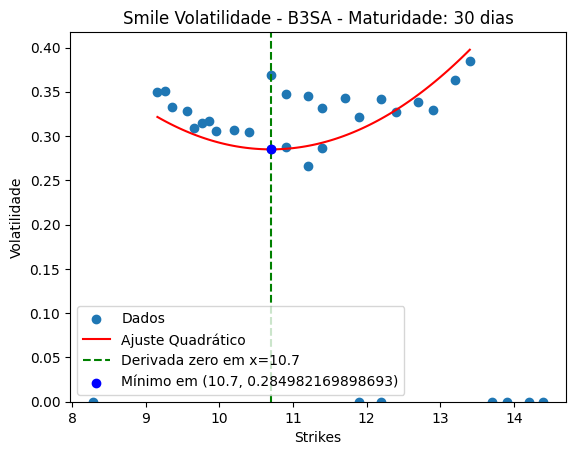

C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_25532\4107859896.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dados_validos.loc[:, 'callPut'] = dados_validos['callPut'].replace({'call': 0, 'put': 1})
C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_25532\4107859896.py:9: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0.119 0.119 0.119 0.119 0.119 0.119 0.119 0.119 0.119 0.119 0.119 0.119
 0.119 0.119 0.119 0.119 0.119 0.119 0.119 0.119 0.119 0.119 0.119 0.119
 0.119 0.119 0.119 0.119 0.119 0.119 0.119 0.119 0.119]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  dados_validos.loc[:, 'diasAteVencimento'] = (dados_valid

Equação ajustada: y = 0.030(x - 10.7)^2 + 0.18851123750209808
Coeficiente de correlação de Pearson: 0.5231


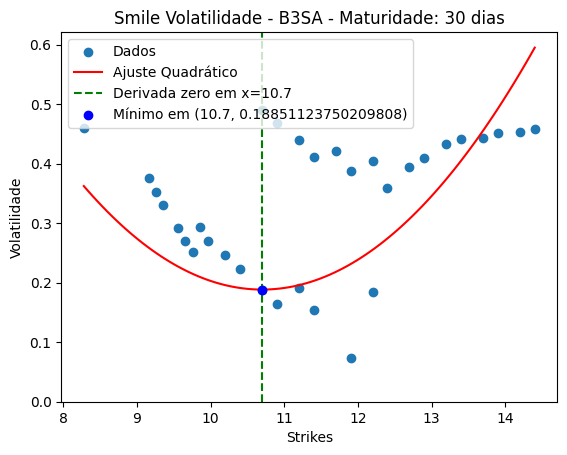

C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_25532\2810010560.py:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dados_validos.loc[:, 'callPut'] = dados_validos['callPut'].replace({'call': 0, 'put': 1})
C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_25532\2810010560.py:10: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dados_faltantes.loc[:, 'callPut'] = dados_faltantes['callPut'].replace({'call': 0, 'put': 1})
C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_25532\2810010560.py:12: FutureWar

Equação ajustada: y = 0.011(x - 10.7)^2 + 0.284982169898693
Coeficiente de correlação de Pearson: 0.5686


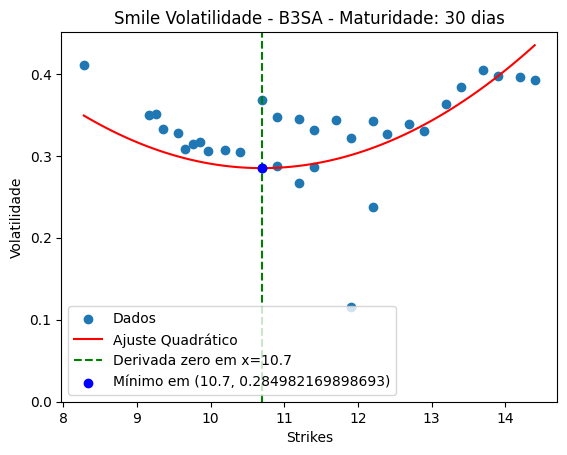

In [ ]:
# resultado
dados_b3_itsa_04102024_dias_ate_vencimento_30 = dados_b3_b3sa_04_10_2024[dados_b3_b3sa_04_10_2024['diasAteVencimento'] == 30]
fitar_superficie(dados_b3_itsa_04102024_dias_ate_vencimento_30, 30, spot_B3SA_04_10_2024, dados_b3_itsa_04102024_dias_ate_vencimento_30.iloc[0]['cod_neg'])

dados_b3_itsa_04102024_dias_ate_vencimento_30 = dados_b3_b3sa_04_10_2024[dados_b3_b3sa_04_10_2024['diasAteVencimento'] == 30]
fittar_superficie_predita(dados_b3_itsa_04102024_dias_ate_vencimento_30, spot_B3SA_04_10_2024, 30)

dados_b3_itsa_04102024_dias_ate_vencimento_30 = dados_b3_b3sa_04_10_2024[dados_b3_b3sa_04_10_2024['diasAteVencimento'] == 30]
fittar_superficie_com_predicoes_para_nao_convergentes(dados_b3_itsa_04102024_dias_ate_vencimento_30, spot_B3SA_04_10_2024, 30)

Equação ajustada: y = 0.008(x - 10.6)^2 + 0.2875953600424293
Coeficiente de correlação de Pearson: 0.1538


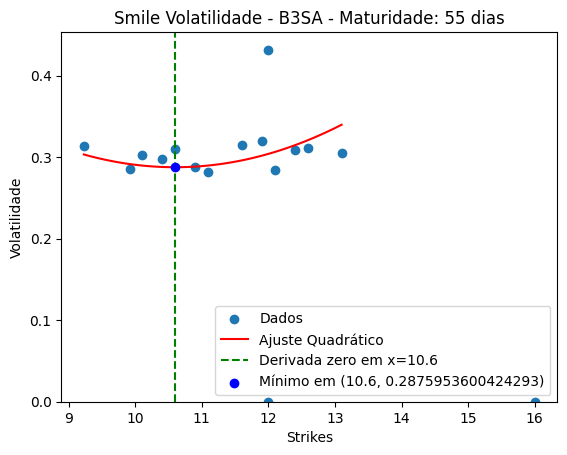

C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_25532\4107859896.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dados_validos.loc[:, 'callPut'] = dados_validos['callPut'].replace({'call': 0, 'put': 1})
C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_25532\4107859896.py:9: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0.218 0.218 0.218 0.218 0.218 0.218 0.218 0.218 0.218 0.218 0.218 0.218
 0.218 0.218 0.218 0.218]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  dados_validos.loc[:, 'diasAteVencimento'] = (dados_validos['diasAteVencimento'] / 252.0).round(3)
C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_2

Equação ajustada: y = 0.003(x - 10.6)^2 + 0.20810389518737793
Coeficiente de correlação de Pearson: -0.2092


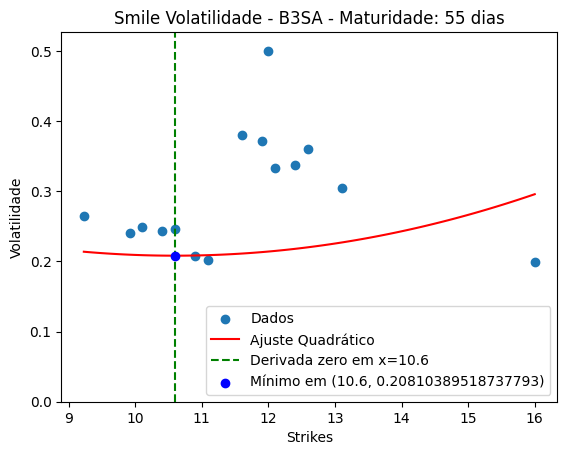

C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_25532\2810010560.py:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dados_validos.loc[:, 'callPut'] = dados_validos['callPut'].replace({'call': 0, 'put': 1})
C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_25532\2810010560.py:10: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dados_faltantes.loc[:, 'callPut'] = dados_faltantes['callPut'].replace({'call': 0, 'put': 1})
C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_25532\2810010560.py:12: FutureWar

Equação ajustada: y = 0.003(x - 10.6)^2 + 0.2875953600424293
Coeficiente de correlação de Pearson: -0.4411


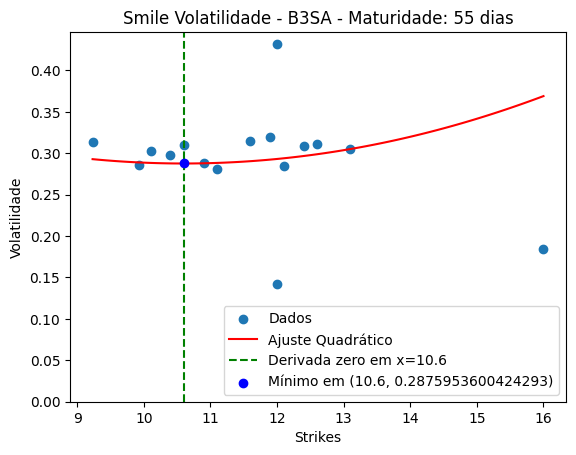

In [41]:
dados_b3_b3sa_04102024_dias_ate_vencimento_55 = dados_b3_b3sa_04_10_2024[dados_b3_b3sa_04_10_2024['diasAteVencimento'] == 55]
fitar_superficie(dados_b3_b3sa_04102024_dias_ate_vencimento_55, 55, spot_B3SA_04_10_2024, dados_b3_b3sa_04102024_dias_ate_vencimento_55.iloc[0]['cod_neg'])

dados_b3_b3sa_04102024_dias_ate_vencimento_55 = dados_b3_b3sa_04_10_2024[dados_b3_b3sa_04_10_2024['diasAteVencimento'] == 55]
fittar_superficie_predita(dados_b3_b3sa_04102024_dias_ate_vencimento_55, spot_B3SA_04_10_2024, 55)

dados_b3_b3sa_04102024_dias_ate_vencimento_55 = dados_b3_b3sa_04_10_2024[dados_b3_b3sa_04_10_2024['diasAteVencimento'] == 55]
fittar_superficie_com_predicoes_para_nao_convergentes(dados_b3_b3sa_04102024_dias_ate_vencimento_55, spot_B3SA_04_10_2024, 55)


Equação ajustada: y = 0.004(x - 10.6)^2 + 0.3058073976356405
Coeficiente de correlação de Pearson: 0.3073


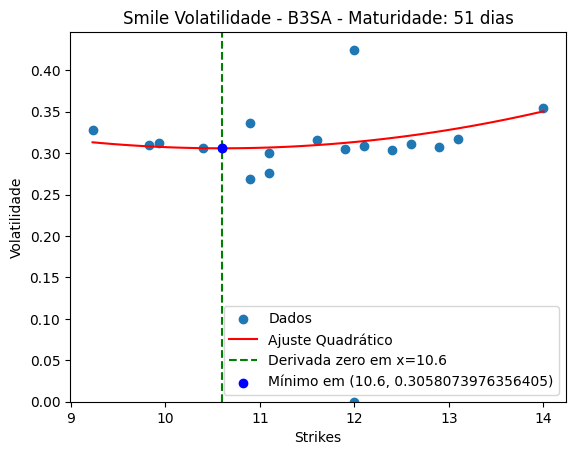

C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_25532\4107859896.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dados_validos.loc[:, 'callPut'] = dados_validos['callPut'].replace({'call': 0, 'put': 1})
C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_25532\4107859896.py:9: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0.202 0.202 0.202 0.202 0.202 0.202 0.202 0.202 0.202 0.202 0.202 0.202
 0.202 0.202 0.202 0.202 0.202 0.202 0.202]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  dados_validos.loc[:, 'diasAteVencimento'] = (dados_validos['diasAteVencimento'] / 252.0).round(3)


Equação ajustada: y = 0.015(x - 10.6)^2 + 0.245458722114563
Coeficiente de correlação de Pearson: 0.3213


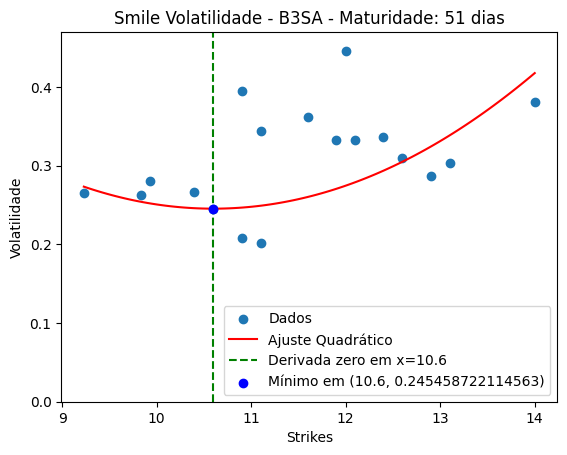

C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_25532\2810010560.py:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dados_validos.loc[:, 'callPut'] = dados_validos['callPut'].replace({'call': 0, 'put': 1})
C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_25532\2810010560.py:10: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dados_faltantes.loc[:, 'callPut'] = dados_faltantes['callPut'].replace({'call': 0, 'put': 1})
C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_25532\2810010560.py:12: FutureWar

Equação ajustada: y = 0.003(x - 10.6)^2 + 0.3058073976356405
Coeficiente de correlação de Pearson: 0.2115


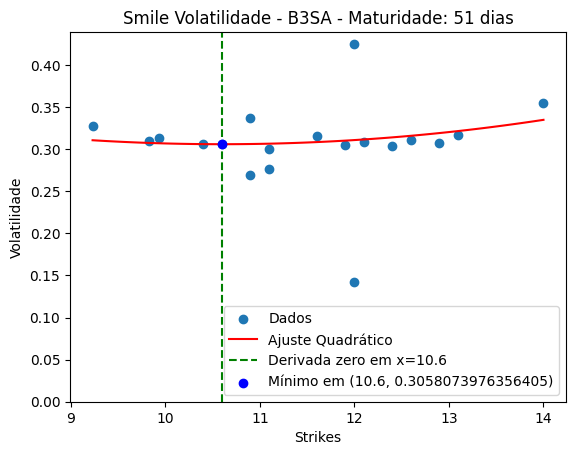

In [ ]:
# resultado
dados_b3_itsa_11102024_dias_ate_vencimento_51 = dados_b3_b3sa_11_10_2024[dados_b3_b3sa_11_10_2024['diasAteVencimento'] == 51]
fitar_superficie(dados_b3_itsa_11102024_dias_ate_vencimento_51, 51, spot_B3SA_11_10_2024, dados_b3_itsa_11102024_dias_ate_vencimento_51.iloc[0]['cod_neg'])

dados_b3_itsa_11102024_dias_ate_vencimento_51 = dados_b3_b3sa_11_10_2024[dados_b3_b3sa_11_10_2024['diasAteVencimento'] == 51]
fittar_superficie_predita(dados_b3_itsa_11102024_dias_ate_vencimento_51, spot_B3SA_11_10_2024, 51)

dados_b3_itsa_11102024_dias_ate_vencimento_51 = dados_b3_b3sa_11_10_2024[dados_b3_b3sa_11_10_2024['diasAteVencimento'] == 51]
fittar_superficie_com_predicoes_para_nao_convergentes(dados_b3_itsa_11102024_dias_ate_vencimento_51, spot_B3SA_11_10_2024, 51)

Equação ajustada: y = 0.009(x - 10.6)^2 + 0.2710555831268905
Coeficiente de correlação de Pearson: 0.5083


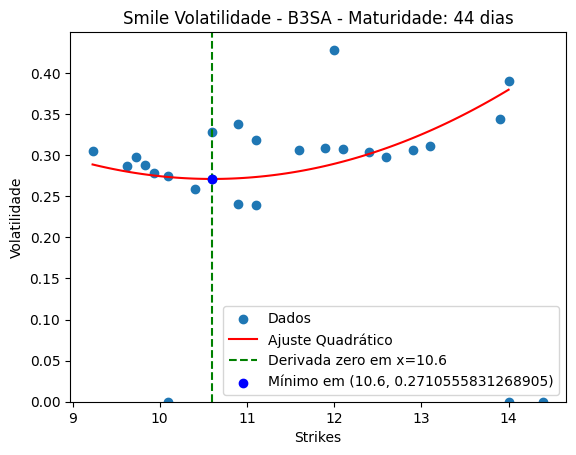

C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_25532\4107859896.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dados_validos.loc[:, 'callPut'] = dados_validos['callPut'].replace({'call': 0, 'put': 1})
C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_25532\4107859896.py:9: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0.175 0.175 0.175 0.175 0.175 0.175 0.175 0.175 0.175 0.175 0.175 0.175
 0.175 0.175 0.175 0.175 0.175 0.175 0.175 0.175 0.175 0.175 0.175 0.175
 0.175 0.175]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  dados_validos.loc[:, 'diasAteVencimento'] = (dados_validos['diasAteVencimento'] / 252.0).round(3)


Equação ajustada: y = 0.003(x - 10.6)^2 + 0.27418479323387146
Coeficiente de correlação de Pearson: -0.2021


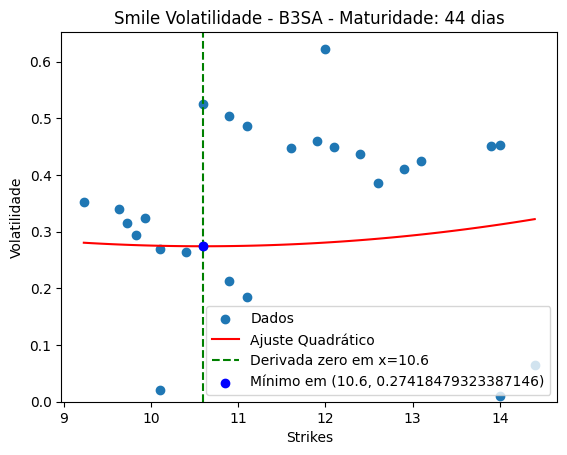

C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_25532\2810010560.py:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dados_validos.loc[:, 'callPut'] = dados_validos['callPut'].replace({'call': 0, 'put': 1})
C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_25532\2810010560.py:10: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dados_faltantes.loc[:, 'callPut'] = dados_faltantes['callPut'].replace({'call': 0, 'put': 1})
C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_25532\2810010560.py:12: FutureWar

Equação ajustada: y = 0.004(x - 10.6)^2 + 0.2710555831268905
Coeficiente de correlação de Pearson: 0.1532


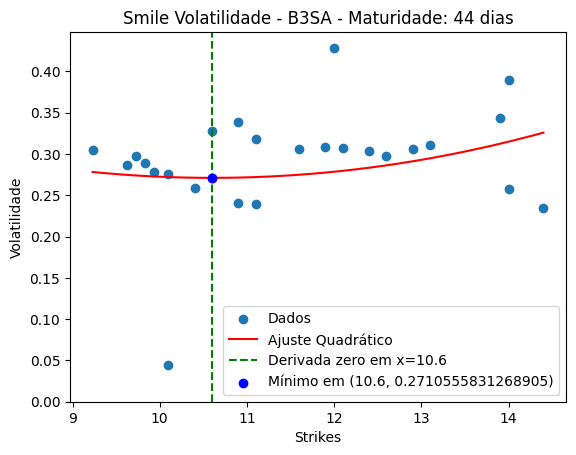

In [43]:
dados_b3_b3sa_18102024_dias_ate_vencimento_44 = dados_b3_b3sa_18_10_2024[dados_b3_b3sa_18_10_2024['diasAteVencimento'] == 44]
fitar_superficie(dados_b3_b3sa_18102024_dias_ate_vencimento_44, 44, spot_B3SA_18_10_2024, dados_b3_b3sa_18102024_dias_ate_vencimento_44.iloc[0]['cod_neg'])

dados_b3_b3sa_18102024_dias_ate_vencimento_44 = dados_b3_b3sa_18_10_2024[dados_b3_b3sa_18_10_2024['diasAteVencimento'] == 44]
fittar_superficie_predita(dados_b3_b3sa_18102024_dias_ate_vencimento_44, spot_B3SA_18_10_2024, 44)

dados_b3_b3sa_18102024_dias_ate_vencimento_44 = dados_b3_b3sa_18_10_2024[dados_b3_b3sa_18_10_2024['diasAteVencimento'] == 44]
fittar_superficie_com_predicoes_para_nao_convergentes(dados_b3_b3sa_18102024_dias_ate_vencimento_44, spot_B3SA_18_10_2024, 44)

<h3>BBDC</h3>

In [40]:
dados_b3_bbdc_04_10_2024 = dados_b3_bbdc[dados_b3_bbdc['dtPregao'] == '2024.10.04']
dados_b3_bbdc_11_10_2024 = dados_b3_bbdc[dados_b3_bbdc['dtPregao'] == '2024.10.11']
dados_b3_bbdc_18_10_2024 = dados_b3_bbdc[dados_b3_bbdc['dtPregao'] == '2024.10.18']

print(dados_b3_bbdc_04_10_2024['diasAteVencimento'].unique())
print(dados_b3_bbdc_11_10_2024['diasAteVencimento'].unique())
print(dados_b3_bbdc_18_10_2024['diasAteVencimento'].unique())

[ 55  30  98 116  73]
[51]
[44]


Equação ajustada: y = 0.016(x - 15.0)^2 + 0.1919886059896865
Coeficiente de correlação de Pearson: 0.3465


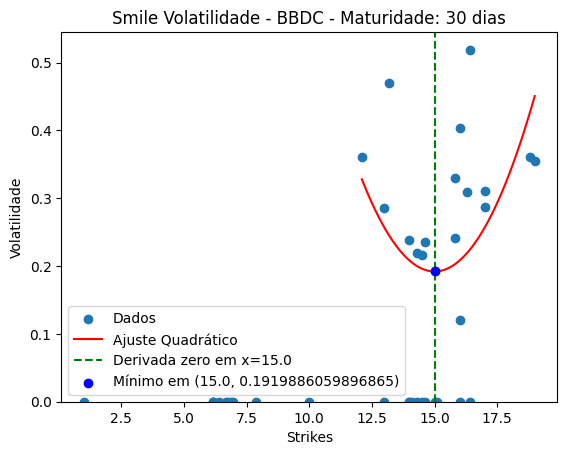

C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_25532\4107859896.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dados_validos.loc[:, 'callPut'] = dados_validos['callPut'].replace({'call': 0, 'put': 1})
C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_25532\4107859896.py:9: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0.119 0.119 0.119 0.119 0.119 0.119 0.119 0.119 0.119 0.119 0.119 0.119
 0.119 0.119 0.119 0.119 0.119 0.119 0.119 0.119 0.119 0.119 0.119 0.119
 0.119 0.119 0.119 0.119 0.119 0.119 0.119 0.119 0.119 0.119 0.119 0.119
 0.119 0.119 0.119 0.119]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  dados_validos

Equação ajustada: y = 0.003(x - 15.1)^2 + 0.03504636883735657
Coeficiente de correlação de Pearson: 0.3131


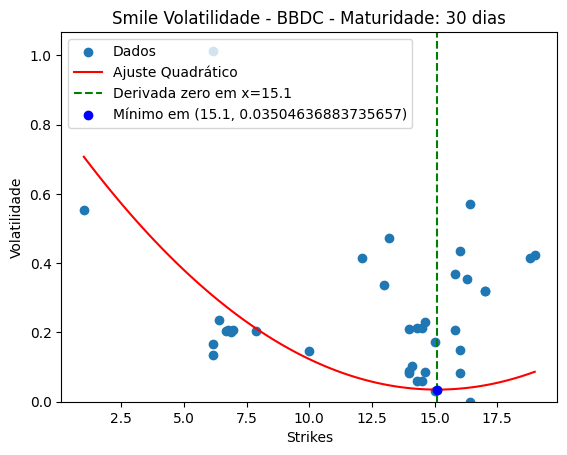

C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_25532\2810010560.py:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dados_validos.loc[:, 'callPut'] = dados_validos['callPut'].replace({'call': 0, 'put': 1})
C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_25532\2810010560.py:10: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dados_faltantes.loc[:, 'callPut'] = dados_faltantes['callPut'].replace({'call': 0, 'put': 1})
C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_25532\2810010560.py:12: FutureWar

Equação ajustada: y = 0.002(x - 15.0)^2 + 0.1919886059896865
Coeficiente de correlação de Pearson: 0.3503


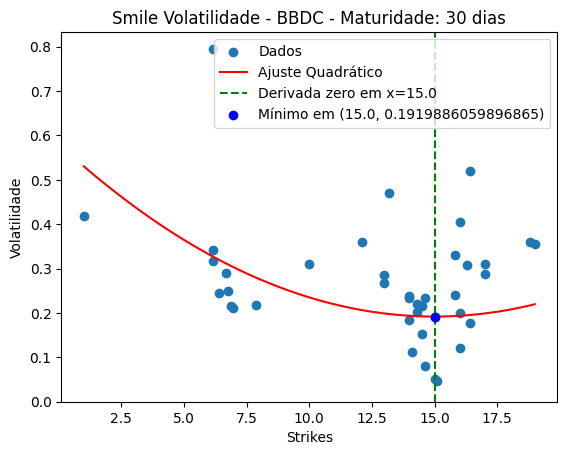

In [ ]:
# resultado
dados_b3_b3sa_04102024_dias_ate_vencimento_30 = dados_b3_bbdc_04_10_2024[dados_b3_bbdc_04_10_2024['diasAteVencimento'] == 30]
fitar_superficie(dados_b3_b3sa_04102024_dias_ate_vencimento_30, 30, spot_BBDC_04_10_2024, dados_b3_b3sa_04102024_dias_ate_vencimento_30.iloc[0]['cod_neg'])

dados_b3_b3sa_04102024_dias_ate_vencimento_30 = dados_b3_bbdc_04_10_2024[dados_b3_bbdc_04_10_2024['diasAteVencimento'] == 30]
fittar_superficie_predita(dados_b3_b3sa_04102024_dias_ate_vencimento_30, spot_BBDC_04_10_2024, 30)

dados_b3_b3sa_04102024_dias_ate_vencimento_30 = dados_b3_bbdc_04_10_2024[dados_b3_bbdc_04_10_2024['diasAteVencimento'] == 30]
fittar_superficie_com_predicoes_para_nao_convergentes(dados_b3_b3sa_04102024_dias_ate_vencimento_30, spot_BBDC_04_10_2024, 30)

Equação ajustada: y = 0.010(x - 15.0)^2 + 0.2075114541162269
Coeficiente de correlação de Pearson: 0.5980


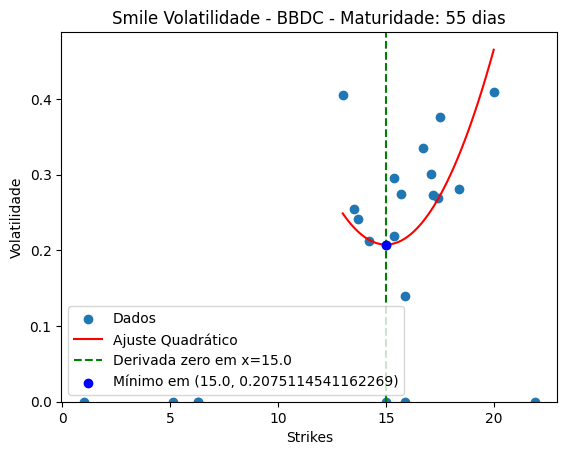

C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_25532\4107859896.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dados_validos.loc[:, 'callPut'] = dados_validos['callPut'].replace({'call': 0, 'put': 1})
C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_25532\4107859896.py:9: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0.218 0.218 0.218 0.218 0.218 0.218 0.218 0.218 0.218 0.218 0.218 0.218
 0.218 0.218 0.218 0.218 0.218 0.218 0.218 0.218 0.218 0.218 0.218]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  dados_validos.loc[:, 'diasAteVencimento'] = (dados_validos['diasAteVencimento'] / 252.0).round(3)
C:\Users\Public\Doc

Equação ajustada: y = 0.004(x - 15.0)^2 + 0.19010667502880096
Coeficiente de correlação de Pearson: 0.6466


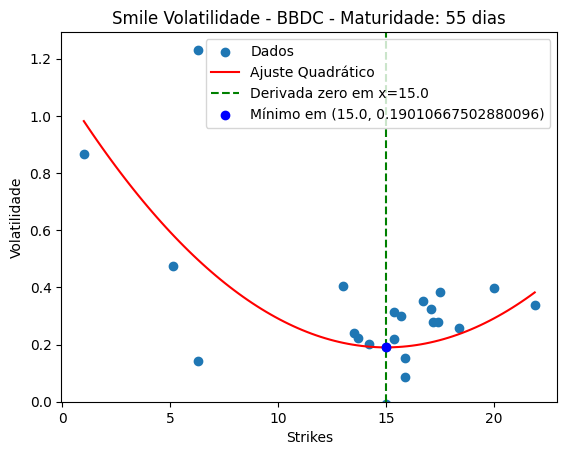

C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_25532\2810010560.py:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dados_validos.loc[:, 'callPut'] = dados_validos['callPut'].replace({'call': 0, 'put': 1})
C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_25532\2810010560.py:10: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dados_faltantes.loc[:, 'callPut'] = dados_faltantes['callPut'].replace({'call': 0, 'put': 1})
C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_25532\2810010560.py:12: FutureWar

Equação ajustada: y = 0.003(x - 15.0)^2 + 0.2075114541162269
Coeficiente de correlação de Pearson: 0.6639


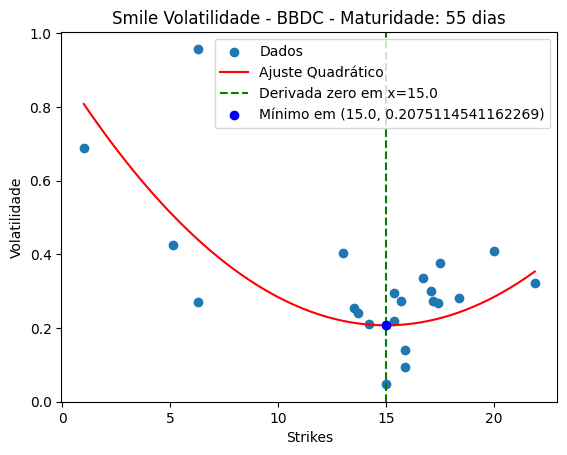

In [53]:
# resultado
dados_b3_b3sa_04102024_dias_ate_vencimento_55 = dados_b3_bbdc_04_10_2024[dados_b3_bbdc_04_10_2024['diasAteVencimento'] == 55]
fitar_superficie(dados_b3_b3sa_04102024_dias_ate_vencimento_55, 55, spot_BBDC_04_10_2024, dados_b3_b3sa_04102024_dias_ate_vencimento_55.iloc[0]['cod_neg'])

dados_b3_b3sa_04102024_dias_ate_vencimento_55 = dados_b3_bbdc_04_10_2024[dados_b3_bbdc_04_10_2024['diasAteVencimento'] == 55]
fittar_superficie_predita(dados_b3_b3sa_04102024_dias_ate_vencimento_55, spot_BBDC_04_10_2024, 55)

dados_b3_b3sa_04102024_dias_ate_vencimento_55 = dados_b3_bbdc_04_10_2024[dados_b3_bbdc_04_10_2024['diasAteVencimento'] == 55]
fittar_superficie_com_predicoes_para_nao_convergentes(dados_b3_b3sa_04102024_dias_ate_vencimento_55, spot_BBDC_04_10_2024, 55)

Equação ajustada: y = 0.015(x - 14.8)^2 + 0.1928190454547995
Coeficiente de correlação de Pearson: 0.3745


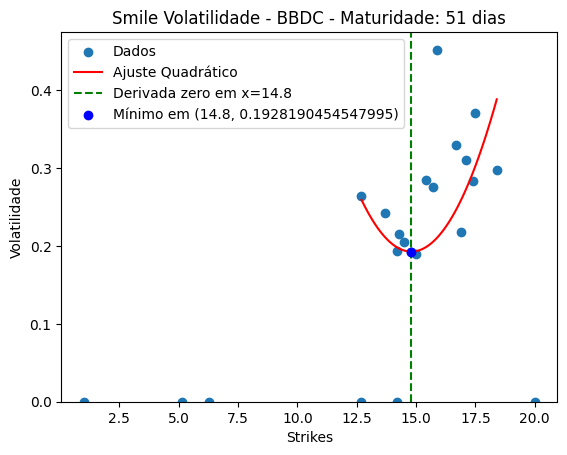

C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_25532\4107859896.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dados_validos.loc[:, 'callPut'] = dados_validos['callPut'].replace({'call': 0, 'put': 1})
C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_25532\4107859896.py:9: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0.202 0.202 0.202 0.202 0.202 0.202 0.202 0.202 0.202 0.202 0.202 0.202
 0.202 0.202 0.202 0.202 0.202 0.202 0.202 0.202 0.202 0.202]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  dados_validos.loc[:, 'diasAteVencimento'] = (dados_validos['diasAteVencimento'] / 252.0).round(3)


Equação ajustada: y = 0.004(x - 14.8)^2 + 0.18511810898780823
Coeficiente de correlação de Pearson: 0.8144


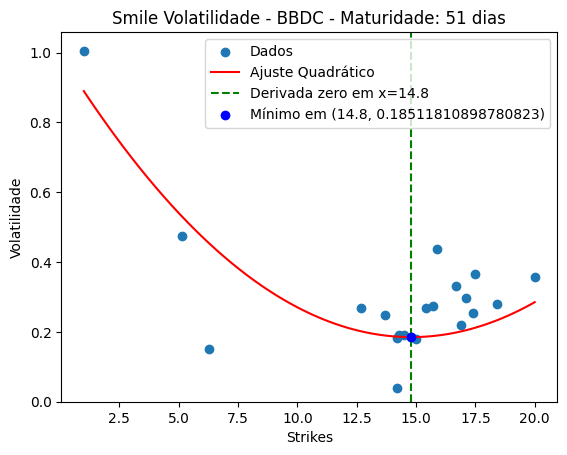

C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_25532\2810010560.py:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dados_validos.loc[:, 'callPut'] = dados_validos['callPut'].replace({'call': 0, 'put': 1})
C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_25532\2810010560.py:10: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dados_faltantes.loc[:, 'callPut'] = dados_faltantes['callPut'].replace({'call': 0, 'put': 1})
C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_25532\2810010560.py:12: FutureWar

Equação ajustada: y = 0.003(x - 14.8)^2 + 0.1928190454547995
Coeficiente de correlação de Pearson: 0.8421


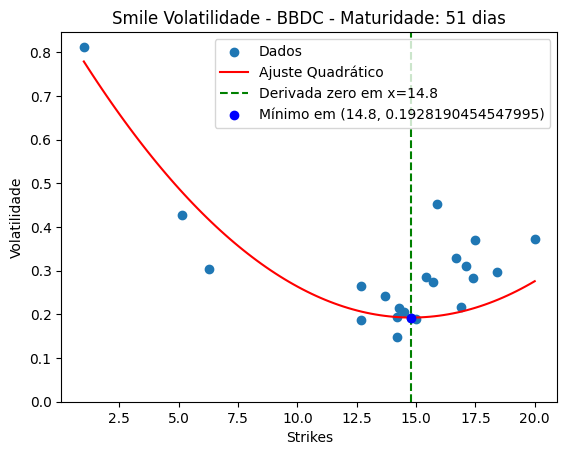

In [ ]:
# resultado maravilhoso
dados_b3_b3sa_11102024_dias_ate_vencimento_51 = dados_b3_bbdc_11_10_2024[dados_b3_bbdc_11_10_2024['diasAteVencimento'] == 51]
fitar_superficie(dados_b3_b3sa_11102024_dias_ate_vencimento_51, 51, spot_BBDC_11_10_2024, dados_b3_b3sa_11102024_dias_ate_vencimento_51.iloc[0]['cod_neg'])

dados_b3_b3sa_11102024_dias_ate_vencimento_51 = dados_b3_bbdc_11_10_2024[dados_b3_bbdc_11_10_2024['diasAteVencimento'] == 51]
fittar_superficie_predita(dados_b3_b3sa_11102024_dias_ate_vencimento_51, spot_BBDC_11_10_2024, 51)

dados_b3_b3sa_11102024_dias_ate_vencimento_51 = dados_b3_bbdc_11_10_2024[dados_b3_bbdc_11_10_2024['diasAteVencimento'] == 51]
fittar_superficie_com_predicoes_para_nao_convergentes(dados_b3_b3sa_11102024_dias_ate_vencimento_51, spot_BBDC_11_10_2024, 51)

Equação ajustada: y = 0.008(x - 15.4)^2 + 0.2569590126018495
Coeficiente de correlação de Pearson: 0.5812


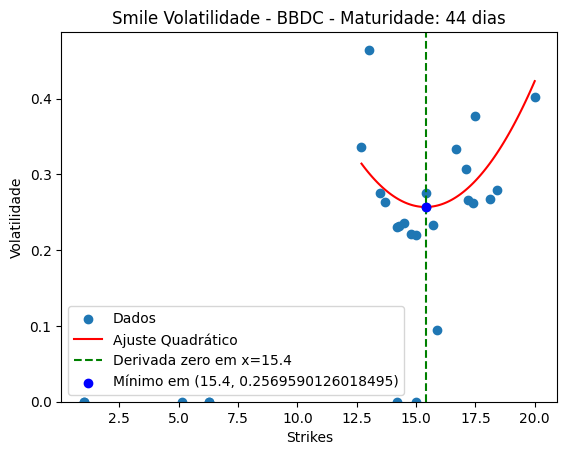

C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_25532\4107859896.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dados_validos.loc[:, 'callPut'] = dados_validos['callPut'].replace({'call': 0, 'put': 1})
C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_25532\4107859896.py:9: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0.175 0.175 0.175 0.175 0.175 0.175 0.175 0.175 0.175 0.175 0.175 0.175
 0.175 0.175 0.175 0.175 0.175 0.175 0.175 0.175 0.175 0.175 0.175 0.175
 0.175 0.175 0.175 0.175]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  dados_validos.loc[:, 'diasAteVencimento'] = (dados_validos['diasAteVencimento'] / 252.

Equação ajustada: y = 0.002(x - 15.4)^2 + 0.2803296744823456
Coeficiente de correlação de Pearson: 0.3929


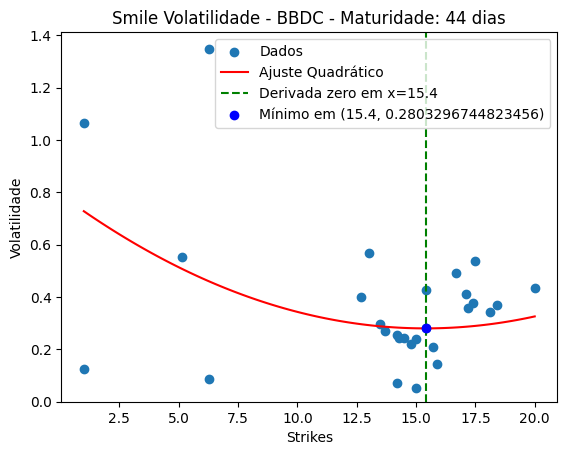

C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_25532\2810010560.py:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dados_validos.loc[:, 'callPut'] = dados_validos['callPut'].replace({'call': 0, 'put': 1})
C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_25532\2810010560.py:10: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dados_faltantes.loc[:, 'callPut'] = dados_faltantes['callPut'].replace({'call': 0, 'put': 1})
C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_25532\2810010560.py:12: FutureWar

Equação ajustada: y = 0.001(x - 15.4)^2 + 0.2569590126018495
Coeficiente de correlação de Pearson: 0.4958


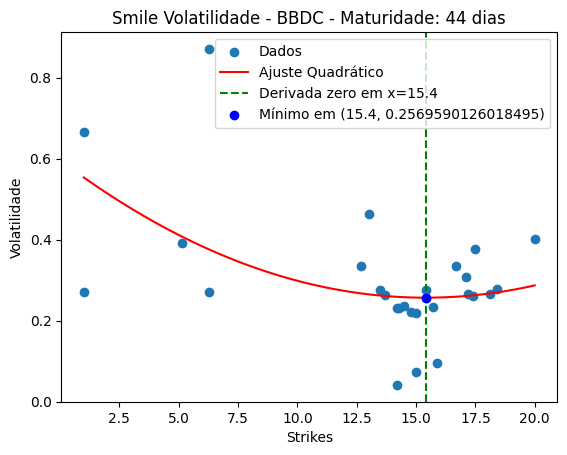

In [ ]:
# resultado
dados_b3_b3sa_18102024_dias_ate_vencimento_44 = dados_b3_bbdc_18_10_2024[dados_b3_bbdc_18_10_2024['diasAteVencimento'] == 44]
fitar_superficie(dados_b3_b3sa_18102024_dias_ate_vencimento_44, 44, spot_BBDC_18_10_2024, dados_b3_b3sa_18102024_dias_ate_vencimento_44.iloc[0]['cod_neg'])

dados_b3_b3sa_18102024_dias_ate_vencimento_44 = dados_b3_bbdc_18_10_2024[dados_b3_bbdc_18_10_2024['diasAteVencimento'] == 44]
fittar_superficie_predita(dados_b3_b3sa_18102024_dias_ate_vencimento_44, spot_BBDC_18_10_2024, 44)

dados_b3_b3sa_18102024_dias_ate_vencimento_44 = dados_b3_bbdc_18_10_2024[dados_b3_bbdc_18_10_2024['diasAteVencimento'] == 44]
fittar_superficie_com_predicoes_para_nao_convergentes(dados_b3_b3sa_18102024_dias_ate_vencimento_44, spot_BBDC_18_10_2024, 44)

<h3>MGLU</h3>

In [56]:
dados_b3_mglu_04_10_2024 = dados_b3_mglu[dados_b3_mglu['dtPregao'] == '2024.10.04']
dados_b3_mglu_11_10_2024 = dados_b3_mglu[dados_b3_mglu['dtPregao'] == '2024.10.11']
dados_b3_mglu_18_10_2024 = dados_b3_mglu[dados_b3_mglu['dtPregao'] == '2024.10.18']

print(dados_b3_mglu_04_10_2024['diasAteVencimento'].unique())
print(dados_b3_mglu_11_10_2024['diasAteVencimento'].unique())
print(dados_b3_mglu_18_10_2024['diasAteVencimento'].unique())

[ 73  30  55 116]
[51]
[44]


Equação ajustada: y = 0.022(x - 9.4)^2 + 0.6390205064398105
Coeficiente de correlação de Pearson: -0.3190


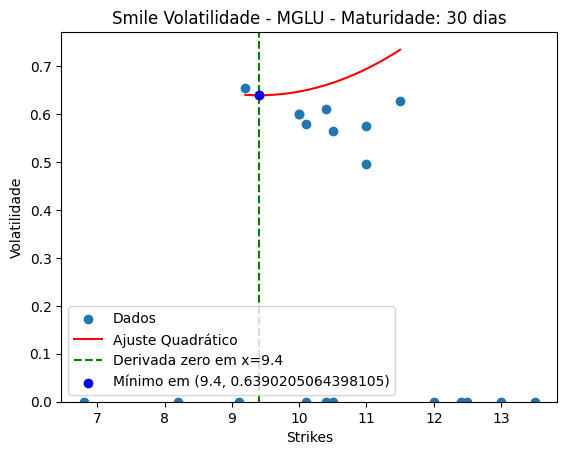

C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_25532\4107859896.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dados_validos.loc[:, 'callPut'] = dados_validos['callPut'].replace({'call': 0, 'put': 1})
C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_25532\4107859896.py:9: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0.119 0.119 0.119 0.119 0.119 0.119 0.119 0.119 0.119 0.119 0.119 0.119
 0.119 0.119 0.119 0.119 0.119 0.119 0.119 0.119 0.119]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  dados_validos.loc[:, 'diasAteVencimento'] = (dados_validos['diasAteVencimento'] / 252.0).round(3)
C:\Users\Public\Documents\Wonde

Equação ajustada: y = 0.011(x - 9.4)^2 + 0.636742889881134
Coeficiente de correlação de Pearson: 0.1066


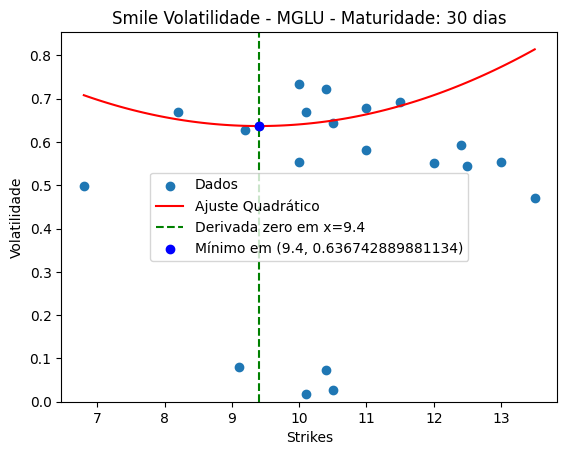

C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_25532\2810010560.py:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dados_validos.loc[:, 'callPut'] = dados_validos['callPut'].replace({'call': 0, 'put': 1})
C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_25532\2810010560.py:10: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dados_faltantes.loc[:, 'callPut'] = dados_faltantes['callPut'].replace({'call': 0, 'put': 1})
C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_25532\2810010560.py:12: FutureWar

Equação ajustada: y = 0.017(x - 9.4)^2 + 0.6390205064398105
Coeficiente de correlação de Pearson: 0.0175


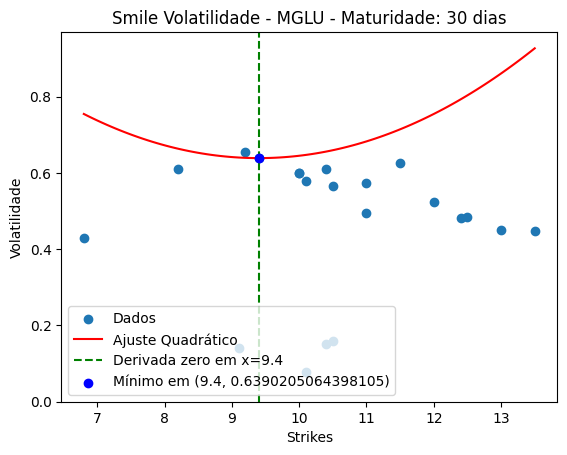

In [57]:
dados_b3_mglu_04102024_dias_ate_vencimento_30 = dados_b3_mglu_04_10_2024[dados_b3_mglu_04_10_2024['diasAteVencimento'] == 30]
fitar_superficie(dados_b3_mglu_04102024_dias_ate_vencimento_30, 30, spot_MGLU_04_10_2024, dados_b3_mglu_04102024_dias_ate_vencimento_30.iloc[0]['cod_neg'])

dados_b3_mglu_04102024_dias_ate_vencimento_30 = dados_b3_mglu_04_10_2024[dados_b3_mglu_04_10_2024['diasAteVencimento'] == 30]
fittar_superficie_predita(dados_b3_mglu_04102024_dias_ate_vencimento_30, spot_MGLU_04_10_2024, 30)

dados_b3_mglu_04102024_dias_ate_vencimento_30 = dados_b3_mglu_04_10_2024[dados_b3_mglu_04_10_2024['diasAteVencimento'] == 30]
fittar_superficie_com_predicoes_para_nao_convergentes(dados_b3_mglu_04102024_dias_ate_vencimento_30, spot_MGLU_04_10_2024, 30)

Equação ajustada: y = 0.004(x - 9.0)^2 + 0.5698638815754316
Coeficiente de correlação de Pearson: -0.0366


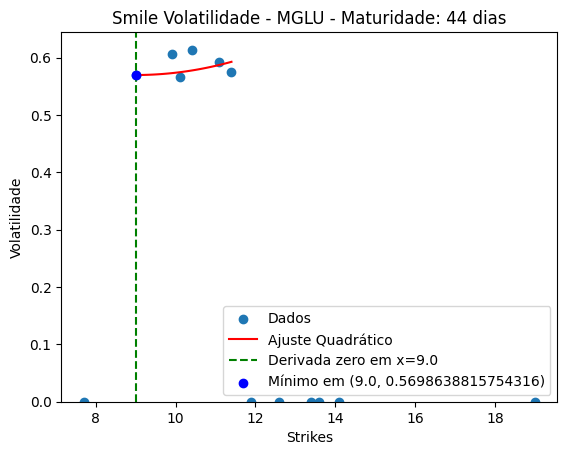

C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_25532\4107859896.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dados_validos.loc[:, 'callPut'] = dados_validos['callPut'].replace({'call': 0, 'put': 1})
C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_25532\4107859896.py:9: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0.175 0.175 0.175 0.175 0.175 0.175 0.175 0.175 0.175 0.175 0.175 0.175
 0.175]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  dados_validos.loc[:, 'diasAteVencimento'] = (dados_validos['diasAteVencimento'] / 252.0).round(3)


Equação ajustada: y = 0.001(x - 9.0)^2 + 0.6037771701812744
Coeficiente de correlação de Pearson: -0.3352


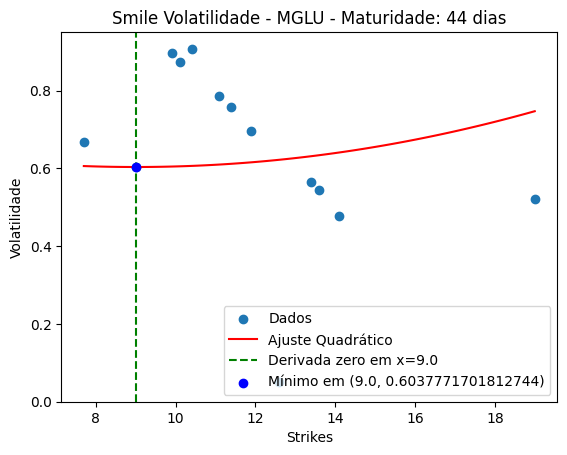

C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_25532\2810010560.py:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dados_validos.loc[:, 'callPut'] = dados_validos['callPut'].replace({'call': 0, 'put': 1})
C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_25532\2810010560.py:10: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dados_faltantes.loc[:, 'callPut'] = dados_faltantes['callPut'].replace({'call': 0, 'put': 1})
C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_25532\2810010560.py:12: FutureWar

Equação ajustada: y = 0.007(x - 9.0)^2 + 0.5698638815754316
Coeficiente de correlação de Pearson: -0.7327


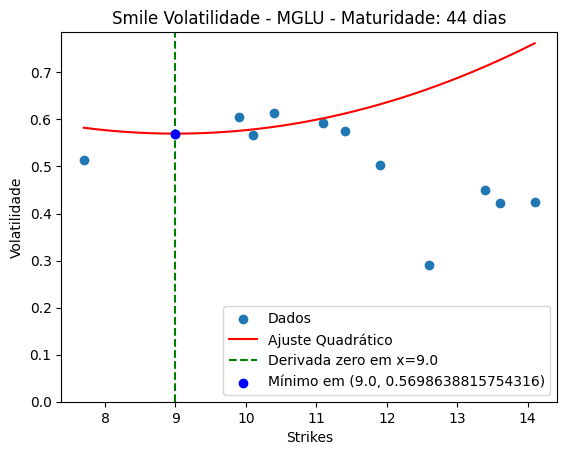

In [60]:
dados_b3_mglu_18102024_dias_ate_vencimento_44 = dados_b3_mglu_18_10_2024[dados_b3_mglu_18_10_2024['diasAteVencimento'] == 44]
fitar_superficie(dados_b3_mglu_18102024_dias_ate_vencimento_44, 44, spot_MGLU_18_10_2024, dados_b3_mglu_18102024_dias_ate_vencimento_44.iloc[0]['cod_neg'])

dados_b3_mglu_18102024_dias_ate_vencimento_44 = dados_b3_mglu_18_10_2024[dados_b3_mglu_18_10_2024['diasAteVencimento'] == 44]
fittar_superficie_predita(dados_b3_mglu_18102024_dias_ate_vencimento_44, spot_MGLU_18_10_2024, 44)

dados_b3_mglu_18102024_dias_ate_vencimento_44 = dados_b3_mglu_18_10_2024[dados_b3_mglu_18_10_2024['diasAteVencimento'] == 44]
fittar_superficie_com_predicoes_para_nao_convergentes(dados_b3_mglu_18102024_dias_ate_vencimento_44, spot_MGLU_18_10_2024, 44)

<h3>GGBR</h3>

In [61]:
dados_b3_ggbr_04_10_2024 = dados_b3_ggbr[dados_b3_ggbr['dtPregao'] == '2024.10.04']
dados_b3_ggbr_11_10_2024 = dados_b3_ggbr[dados_b3_ggbr['dtPregao'] == '2024.10.11']
dados_b3_ggbr_18_10_2024 = dados_b3_ggbr[dados_b3_ggbr['dtPregao'] == '2024.10.18']

print(dados_b3_ggbr_04_10_2024['diasAteVencimento'].unique())
print(dados_b3_ggbr_11_10_2024['diasAteVencimento'].unique())
print(dados_b3_ggbr_18_10_2024['diasAteVencimento'].unique())

[73 30 55]
[51]
[44]


Equação ajustada: y = 0.005(x - 19.3)^2 + 0.2901001482334319
Coeficiente de correlação de Pearson: 0.4567


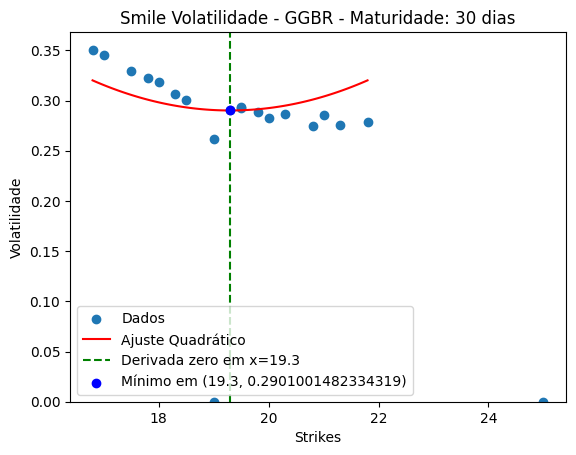

C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_25532\4107859896.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dados_validos.loc[:, 'callPut'] = dados_validos['callPut'].replace({'call': 0, 'put': 1})
C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_25532\4107859896.py:9: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0.119 0.119 0.119 0.119 0.119 0.119 0.119 0.119 0.119 0.119 0.119 0.119
 0.119 0.119 0.119 0.119 0.119 0.119 0.119 0.119]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  dados_validos.loc[:, 'diasAteVencimento'] = (dados_validos['diasAteVencimento'] / 252.0).round(3)
C:\Users\Public\Documents\Wondershare

Equação ajustada: y = 0.006(x - 19.3)^2 + 0.35400402545928955
Coeficiente de correlação de Pearson: 0.7242


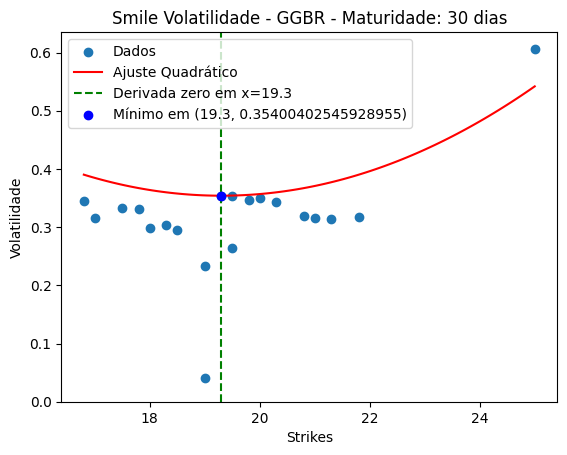

C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_25532\2810010560.py:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dados_validos.loc[:, 'callPut'] = dados_validos['callPut'].replace({'call': 0, 'put': 1})
C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_25532\2810010560.py:10: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dados_faltantes.loc[:, 'callPut'] = dados_faltantes['callPut'].replace({'call': 0, 'put': 1})
C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_25532\2810010560.py:12: FutureWar

Equação ajustada: y = 0.007(x - 19.3)^2 + 0.2901001482334319
Coeficiente de correlação de Pearson: 0.7777


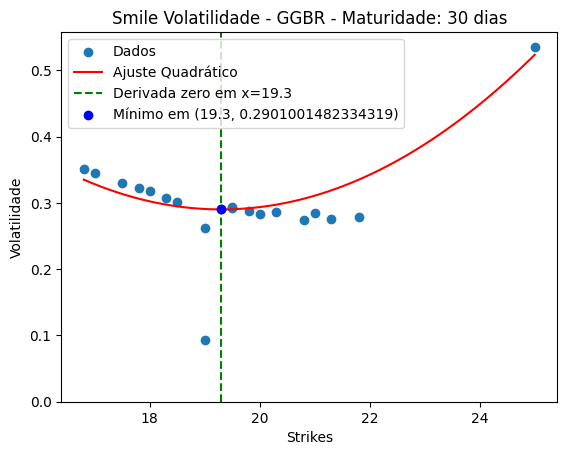

In [ ]:
# resultado maravilhoso
dados_b3_ggbr_04102024_dias_ate_vencimento_30 = dados_b3_ggbr_04_10_2024[dados_b3_ggbr_04_10_2024['diasAteVencimento'] == 30]
fitar_superficie(dados_b3_ggbr_04102024_dias_ate_vencimento_30, 30, spot_GGBR_04_10_2024, dados_b3_ggbr_04102024_dias_ate_vencimento_30.iloc[0]['cod_neg'])

dados_b3_ggbr_04102024_dias_ate_vencimento_30 = dados_b3_ggbr_04_10_2024[dados_b3_ggbr_04_10_2024['diasAteVencimento'] == 30]
fittar_superficie_predita(dados_b3_ggbr_04102024_dias_ate_vencimento_30, spot_GGBR_04_10_2024, 30)

dados_b3_ggbr_04102024_dias_ate_vencimento_30 = dados_b3_ggbr_04_10_2024[dados_b3_ggbr_04_10_2024['diasAteVencimento'] == 30]
fittar_superficie_com_predicoes_para_nao_convergentes(dados_b3_ggbr_04102024_dias_ate_vencimento_30, spot_GGBR_04_10_2024, 30)

Equação ajustada: y = 0.001(x - 17.6)^2 + 0.2892210150180901
Coeficiente de correlação de Pearson: 0.1125


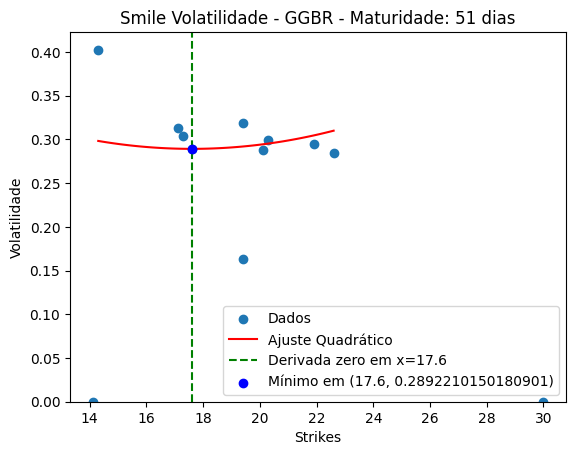

C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_25532\4107859896.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dados_validos.loc[:, 'callPut'] = dados_validos['callPut'].replace({'call': 0, 'put': 1})
C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_25532\4107859896.py:9: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0.202 0.202 0.202 0.202 0.202 0.202 0.202 0.202 0.202 0.202 0.202 0.202]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  dados_validos.loc[:, 'diasAteVencimento'] = (dados_validos['diasAteVencimento'] / 252.0).round(3)


Equação ajustada: y = 0.001(x - 17.6)^2 + 0.24925614893436432
Coeficiente de correlação de Pearson: 0.3822


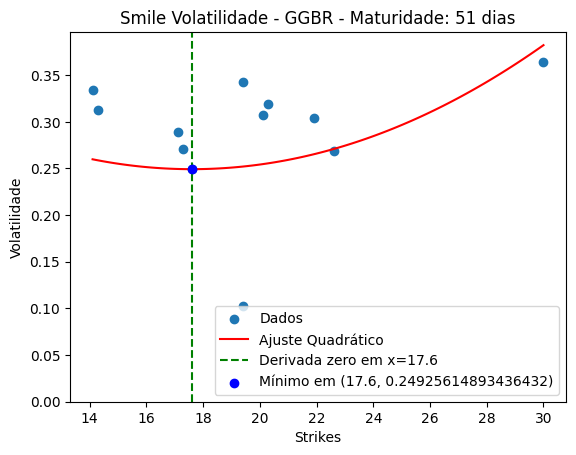

C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_25532\2810010560.py:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dados_validos.loc[:, 'callPut'] = dados_validos['callPut'].replace({'call': 0, 'put': 1})
C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_25532\2810010560.py:10: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dados_faltantes.loc[:, 'callPut'] = dados_faltantes['callPut'].replace({'call': 0, 'put': 1})
C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_25532\2810010560.py:12: FutureWar

Equação ajustada: y = 0.000(x - 17.6)^2 + 0.2892210150180901
Coeficiente de correlação de Pearson: 0.2516


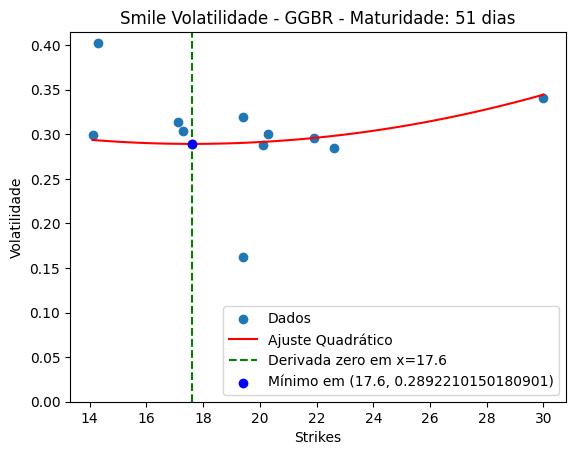

In [67]:
# resultado maravilhoso
dados_b3_ggbr_11102024_dias_ate_vencimento_51 = dados_b3_ggbr_11_10_2024[dados_b3_ggbr_11_10_2024['diasAteVencimento'] == 51]
fitar_superficie(dados_b3_ggbr_11102024_dias_ate_vencimento_51, 51, spot_GGBR_11_10_2024, dados_b3_ggbr_11102024_dias_ate_vencimento_51.iloc[0]['cod_neg'])

dados_b3_ggbr_11102024_dias_ate_vencimento_51 = dados_b3_ggbr_11_10_2024[dados_b3_ggbr_11_10_2024['diasAteVencimento'] == 51]
fittar_superficie_predita(dados_b3_ggbr_11102024_dias_ate_vencimento_51, spot_GGBR_11_10_2024, 51)

dados_b3_ggbr_11102024_dias_ate_vencimento_51 = dados_b3_ggbr_11_10_2024[dados_b3_ggbr_11_10_2024['diasAteVencimento'] == 51]
fittar_superficie_com_predicoes_para_nao_convergentes(dados_b3_ggbr_11102024_dias_ate_vencimento_51, spot_GGBR_11_10_2024, 51)